In [4]:
import pandas as pd
import re
df_active = pd.read_excel("Active.xlsx")

# Display the first few rows
df_active.head()
df_data = df_active
pd.set_option("display.max_columns", None)
df_data.head(5)

ID Enrolment Date Initial Care Plan Time/Session 1  \
0  2           20/4              3x4      12:35 20/4   
1  4           19/4               3x4   12:55pm 19/4   
2  5           21/4               3x4   12:35pm 21/4   
3  6           20/4              3x4     1:40pm 20/4   
4  7           19/4               3x4    1:05PM 19/4   

                   Vertebral Subluxation Before Care  \
0  PL Sx ++, L5 BR +++, T11 BL +++, T4 BR +++, C2...   
1  Apex post Sx +++, T10 BR ++, T3 anterior +++, ...   
2  L AI Sx +++, PR Sx ++, L3 BR ++, T11 BR ++, T4...   
3  R AI Sx +++, L5 BL ++, T9 BR +, T4 BR +++, C1 ...   
4  PL Sx +++, L5 BL ++, T11 BR ++, T4 anterior ++...   

                              Chiro Adjustment Time/Session 2  \
0  PL Sx, L5 BR, T4 BR Anterior, C2 BR, C6 BL     8:50am 22/4   
1            Apex post Sx, T3 anterior, C2 BL    11:50am 20/4   
2              L AI Sx, T4 BL anterior, C1 PIR   12:55pm 22/4   
3      R AI Sx, T4 BR Anterior, C1 PIR, C4 BL    12:45pm 22/4   
4                    PL Sx, T4 anterior, C6 BR   12:20pm 20/4   

                 Vertebral Subluxation Before Care.1  \
0  PL Sx +++, R PI +, T4 BR +++, C1 PIL +++, C2 B...   
1  PL Sx +++, T8 BR ++, T3 BR ++, C2 BL ++, C5 BR...   
2  PL Sx +++, T12 BR +++, T4 BL +++, C1 PIR +++, ...   
3  PL Sx +++, L1 BL +, T4 BR +++, C1 PIR +++, C4 ...   
4          PL Sx ++, T3 BR +++, C2 BR +++, C6 BL +++   

                              Chiro Adjustment.1 Time/Session 3  \
0          PL Sx, T4 BR anterior, C1 PIL, C2 BR     9:20AM 23/4   
1                     PL Sx, T8 BR, C2 BL, C5 BR     10:06 23/4   
2  PL Sx, T12 BR, T4 BL anterior, C1 PIR, C6 BL    2:20pm 25/04   
3                   PL Sx, T4 BR, C1 PIR, C4 BL        3pm 25/4   
4            PL Sx, T3 BR Anterior, C2 BR, C6 BL   10:26AM 23/4   

                 Vertebral Subluxation Before Care.2  \
0  L5 BR +++, T10 BR +++, T3 BL +++, C2 BR +++, C...   
1  PL Sx +++, T12 BR ++, T4 BR +++, C6 BR +++, C2...   
2                   PL Sx +++, T7 BR +++, C1 PIR +++   
3  PL Sx +++, T8 BR +++, T3 BR +++, C1 ASR +++, C...   
4  Apex Post Sx +++, T11 BL ++, T3 BR +++, C2 BR ...   

                             Chiro Adjustment.2 Time/Session 4  \
0                   L5 BR, T3 BL, C2 BR, C5 BL    12:30am 26/4   
1          PL Sx, T4 BR ANTERIOR, C6 BR, C2 BL    12:55PM 26/4   
2                         PL Sx, T7 BR, C1 PIR     2:20pm 27/4   
3  PL Sx, T8 BR, T3 BR Anterior, C1 ASR, C3 BL     2:16PM 26/4   
4   Apex Post Sx, T3 BR Anterior, C2 BR, C6 BL    12:51PM 26/4   

           Vertebral Subluxation Before Care.3            Chiro Adjustment.3  \
0   PR Sx +++, T9 BR +++, T3 BL +++, C2 BR +++   PR Sx, T9 BR, T3 BL, C2 BR    
1   PL SX +++, T8 BR +++, C6 BR +++, C4 BL +++   PL SX, T8 BR, C6 BR, C4 BL    
2    PL Sx +++, T6 BR +++, C2 BR ++, C5 BL +++   PL Sx, T6 BR, C2 BR, C5 BL    
3  PL SX +++, T6 BR +++, C1 ASR +++, C3 BL +++   PL SX, T6 BR, C1 ASR, C3 BL   
4  PL SX +++, T11 BR +++, T4 BR +++, C4 BR +++  PL SX, T11 BR, T4 BR, C4 BR    

  Time/Session 5                Vertebral Subluxation Before Care.4  \
0   11:35am 27/4          L PI +++, T4 BR +++, C2 BR +++, C5 BL +++   
1       1pm 27/4                  L AI Sx +++, T7 BR +++, C2 BL +++   
2    11:05am 7/5          PR Sx +++, T7 BL +++, C2 BR ++, C3 BL +++   
3     1:32PM 7/5  PL SX +++, R AI SX +++, L5 BL ++, T12 BR ++, T...   
4    1:10PM 27/4                     R PI +++, T6 BR +++, C2 BL +++   

                       Chiro Adjustment.4 Time/Session 6  \
0              L PI, T4 BR, C2 BR, C5 BL    11:50AM 28/4   
1                   L AI Sx, T7 BR, C2 BL      8:50 10/5   
2              PR Sx, T7 BL, C2 BR, C3 BL    9:53AM 11/5   
3  PL SX,T12 BR ACT, T6 BL, C2 BR, C4 BL     9:37AM 10/5   
4                     R PI, T6 BR, C2 BL     8:45AM 10/5   

           Vertebral Subluxation Before Care.5  \
0     PR SX +++, T7 BR +++, C3 BL ++, C2 BR ++   
1  PL SX +++, T5 BR +++, C1 PIL +++, C4 BR +++   
2    PL SX +++, T7 BL ++, C1 PIR +++, C3 BL 

In [5]:
data = df_active
print(list(data));
print("Number of observations in the data set:",data.shape[0]);
data.drop_duplicates() 
print("Number of observations in the data set after dropping duplicates:",data.shape[0]);
print(data.isnull().values.any());
print(data.isnull().sum())
print("Total number of null values:",sum(data.isnull().sum()))

['ID', 'Enrolment Date', 'Initial Care Plan', 'Time/Session 1', 'Vertebral Subluxation Before Care', 'Chiro Adjustment', 'Time/Session 2', 'Vertebral Subluxation Before Care.1', 'Chiro Adjustment.1', 'Time/Session 3', 'Vertebral Subluxation Before Care.2', 'Chiro Adjustment.2', 'Time/Session 4', 'Vertebral Subluxation Before Care.3', 'Chiro Adjustment.3', 'Time/Session 5', 'Vertebral Subluxation Before Care.4', 'Chiro Adjustment.4', 'Time/Session 6', 'Vertebral Subluxation Before Care.5', 'Chiro Adjustment.5', 'Time/Session 7', 'Vertebral Subluxation Before Care.6', 'Chiro Adjustment.6', 'Time/Session 8', 'Vertebral Subluxation Before Care.7', 'Chiro Adjustment.7', 'Time/Session 9', 'Vertebral Subluxation Before Care.8', 'Chiro Adjustment.8', 'Time/Session 10', 'Vertebral Subluxation Before Care.9', 'Chiro Adjustment.9', 'Time/Session 11', 'Vertebral Subluxation Before Care.10', 'Chiro Adjustment.10', 'Time/Session 12', 'Vertebral Subluxation Before Care.11', 'Chiro Adjustment.11', 'Cu

In [6]:
vs_columns = [col for col in df_data.columns if col.startswith("Vertebral Subluxation")]
print(vs_columns)

['Vertebral Subluxation Before Care', 'Vertebral Subluxation Before Care.1', 'Vertebral Subluxation Before Care.2', 'Vertebral Subluxation Before Care.3', 'Vertebral Subluxation Before Care.4', 'Vertebral Subluxation Before Care.5', 'Vertebral Subluxation Before Care.6', 'Vertebral Subluxation Before Care.7', 'Vertebral Subluxation Before Care.8', 'Vertebral Subluxation Before Care.9', 'Vertebral Subluxation Before Care.10', 'Vertebral Subluxation Before Care.11', 'Vertebral Subluxation Before Care.12', 'Vertebral Subluxation Before Care.13', 'Vertebral Subluxation Before Care.14', 'Vertebral Subluxation Before Care.15', 'Vertebral Subluxation Before Care.16', 'Vertebral Subluxation Before Care.17', 'Vertebral Subluxation Before Care.18', 'Vertebral Subluxation Before Care.19', 'Vertebral Subluxation Before Care.20', 'Vertebral Subluxation Before Care.21', 'Vertebral Subluxation Before Care.22', 'Vertebral Subluxation Before Care.23', 'Vertebral Subluxation Before Care.24', 'Vertebral 

EXTRACTING SCORES

In [ ]:
import pandas as pd
import re

# Select the columns that start with 'Vertebral Subluxation Before Care'
vs_columns = [col for col in df_data.columns if col.startswith("Vertebral Subluxation Before Care")]

# Fill NaN values with empty strings
df_data[vs_columns] = df_data[vs_columns].fillna("")

# Process each Vertebral Subluxation column separately
for col in vs_columns:
    extracted_terms = set()
    new_columns = {}

    # Extract unique labels from the current column
    for entry in df_data[col]:
        matches = re.findall(r"([\w\s]+?)\s*\++", entry)  # Extract words before '+'
        extracted_terms.update(matches)

    # Create empty columns for each term found
    for term in sorted(extracted_terms):  # Sorting for consistent order
        new_col_name = term.strip()  # Clean term name
        new_columns[new_col_name] = [0] * len(df_data)  # Initialize column with 0s

    # Populate the new columns with the count of '+' signs for each term
    for idx, entry in df_data[col].items():
        matches = re.findall(r"([\w\s]+?)\s*(\++)", entry)  # Extract the term and the '+' signs
        for match, plus_signs in matches:
            term = match.strip()
            count_plus_signs = len(plus_signs)  # Count the '+' signs
            new_columns[term][idx] = count_plus_signs  # Set the count in the new column

    # Convert new columns into a DataFrame
    new_df = pd.DataFrame(new_columns)

    # Insert new columns right after the current "Vertebral Subluxation Before Care" column
    col_index = df_data.columns.get_loc(col)  # Get index of the original column
    df_data = pd.concat([df_data.iloc[:, :col_index + 1], new_df, df_data.iloc[:, col_index + 1:]], axis=1)

pd.set_option("display.max_columns", None)
df_data.head(2)

In [ ]:
num_columns = len(df_data.columns)
print(f"Number of columns: {num_columns}")

MOVING CHIRO ADJUSTMENT COLUMNS TO THE END

In [ ]:
# Identify columns that start with "Chiro Adjustment"
chiro_columns = [col for col in df_data.columns if col.startswith("Chiro Adjustment")]

# Create new column names sequentially
new_chiro_columns = {col: f"Chiro Adjustment {i+1}" for i, col in enumerate(chiro_columns)}

# Move Chiro Adjustment columns to the end
df_rearranged = df_data.drop(columns=chiro_columns)  # Remove from original position
df_rearranged = pd.concat([df_rearranged, df_data[chiro_columns].rename(columns=new_chiro_columns)], axis=1)

# Display the first few rows of the modified DataFrame
df_rearranged.head()

In [ ]:
vs_columns = [col for col in df_rearranged.columns if col.startswith("Vertebral Subluxation Before Care")]

# Drop these columns
df_cleaned = df_rearranged.drop(columns=vs_columns)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

In [ ]:
num_columns = len(df_cleaned.columns)
print(f"Number of columns: {num_columns}")

Renaming the columns by adding the prefix "Time/Session"

In [ ]:
# Identify session columns
session_cols = [col for col in df_cleaned.columns if col.startswith("Time/Session")]

# Get the index of "Chiro Adjustment 1"
#chiro_adjustment_idx = df_cleaned.columns.get_loc("Chiro Adjustment 1")

# Rename columns between session time markers
for i in range(len(session_cols) - 1):
    session_prefix = session_cols[i]  # Get current session name
    start_idx = df_cleaned.columns.get_loc(session_cols[i]) + 1
    end_idx = min(df_cleaned.columns.get_loc(session_cols[i + 1]), chiro_adjustment_idx)  # Stop before "Chiro Adjustment 1"

    # Rename columns in the range
    df_cleaned.columns = [
        f"{session_prefix}_{col}" if start_idx <= idx < end_idx else col
        for idx, col in enumerate(df_cleaned.columns)
    ]

# Rename columns after the last session time marker but before "Chiro Adjustment 1"
last_session_prefix = session_cols[-1]
last_idx = df_cleaned.columns.get_loc(last_session_prefix) + 1

df_cleaned.columns = [
    f"{last_session_prefix}_{col}" if last_idx <= idx < chiro_adjustment_idx else col
    for idx, col in enumerate(df_cleaned.columns)
]

df_cleaned.head()


In [ ]:
# Remove spaces and convert column names to uppercase for case-insensitive comparison
cleaned_cols = [col.replace(" ", "").upper() for col in df_cleaned.columns]

# Count occurrences of each column name
col_counts = {}
for col in cleaned_cols:
    col_counts[col] = col_counts.get(col, 0) + 1

# Filter only duplicate columns (appearing more than once)
duplicate_columns = {col: count for col, count in col_counts.items() if count > 1}

# Count the total number of duplicate occurrences
total_duplicate_instances = sum(count - 1 for count in duplicate_columns.values())

# Print results
if duplicate_columns:
    print("Duplicate columns found (case-insensitive, spaces removed):")
    for col, count in duplicate_columns.items():
        print(f"Column '{col}' appears {count} times.")
    
    print(f"Total number of duplicate column instances: {total_duplicate_instances}")
    print(f"Total unique duplicate column names: {len(duplicate_columns)}")
else:
    print("No duplicate columns found (case-insensitive, spaces removed).")


REMOVING DUPLICATE COLUMNS

In [ ]:
import pandas as pd
import numpy as np

# Remove spaces and convert column names to uppercase for case-insensitive comparison
normalized_col_map = {col: col.replace(" ", "").upper() for col in df_cleaned.columns}

# Identify duplicate columns
seen_cols = {}
duplicate_cols = {}

for original_col, normalized_col in normalized_col_map.items():
    if normalized_col in seen_cols:
        # Store duplicates
        duplicate_cols.setdefault(normalized_col, []).append(original_col)
    else:
        seen_cols[normalized_col] = original_col  # Keep track of the first occurrence

# Transfer values from duplicates to the first occurrence
for normalized_col, dup_list in duplicate_cols.items():
    first_col = seen_cols[normalized_col]  # The first occurrence (original column)
    
    for dup_col in dup_list:
        # Replace 0s in original column with nonzero values from duplicate column
        df_cleaned[first_col] = df_cleaned[first_col].mask(df_cleaned[first_col] == 0, df_cleaned[dup_col])

        # Drop the duplicate column after merging
        df_cleaned.drop(columns=[dup_col], inplace=True)

# Print updated DataFrame
print("Duplicate columns removed, values merged into original columns.")
print(df_cleaned.head())


In [ ]:
df_cleaned.to_csv("C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Active_preprocessed.csv", index=False)


REPEAT THE SAME FOR PASSIVE RAW DATA

MERGING ACTIVE AND PASSIVE DATA TOGETHER

In [2]:
import pandas as pd
import re

# Load datasets
df1 = pd.read_csv("Active_preprocessed.csv")
df2 = pd.read_csv("Passive_preprocessed.csv")

# Function to clean column names (uppercase + remove spaces)
def clean_columns(columns):
    return [col.upper().replace(" ", "") for col in columns]

# Apply column cleaning to both DataFrames
df1.columns = clean_columns(df1.columns)
df2.columns = clean_columns(df2.columns)

# Combine all unique columns while maintaining df1 order first
all_columns = list(df1.columns) + [col for col in df2.columns if col not in df1.columns]

# Function to extract session number from column names
def extract_session_number(column_name):
    match = re.search(r"TIME/SESSION(\d+)", column_name)
    return int(match.group(1)) if match else float('inf')  # Non-session columns get 'inf'

# Identify position of "CHIROADJUSTMENT35" (fixed columns)
if "CHIROADJUSTMENT35" in all_columns:
    split_index = all_columns.index("CHIROADJUSTMENT35") + 1
else:
    split_index = len(all_columns)  # If not found, assume all columns are flexible

# Separate columns into two groups:
fixed_columns = all_columns[:split_index]  # Columns before "CHIROADJUSTMENT35"
session_columns = all_columns[split_index:]  # TIME/SESSION columns

# Sort session columns based on extracted session number
session_columns_sorted = sorted(session_columns, key=extract_session_number)

# Final column order: fixed columns + sorted session columns
final_order = fixed_columns + session_columns_sorted

# Reindex both DataFrames to match this order (fill missing with 0)
df1 = df1.reindex(columns=final_order, fill_value=0)
df2 = df2.reindex(columns=final_order, fill_value=0)

# Concatenate the two DataFrames
df_merged = pd.concat([df1, df2], ignore_index=True)

# Save the cleaned and reordered dataset
df_merged.to_csv("Merged_Cleaned_Reordered.csv", index=False)

# Display result
print("Final dataset shape:", df_merged.shape)


Final dataset shape: (207, 1861)


WHILE MERGING SOME OF THE COLUMNS WHICH ARE NOT COMMON WERE ADDED AT THE END OF THE DATASET , THOSE COLUMNS WERE COUNTED AND LOCATED

In [3]:
# Find the index of the column 'CHIROADJUSTMENT35'
column_index = df_merged.columns.get_loc('CHIROADJUSTMENT35')

# Count the number of columns after 'CHIROADJUSTMENT35'
columns_after = len(df_merged.columns) - column_index - 1

# Print the result
print(f"There are {columns_after} columns after 'CHIROADJUSTMENT35'.")

# Find the index of the column 'CHIROADJUSTMENT35'
column_index = df_merged.columns.get_loc('CHIROADJUSTMENT35')

# Get the column names after 'CHIROADJUSTMENT35'
columns_after = df_merged.columns[column_index + 1:]

# Print the column names
print("Columns after 'CHIROADJUSTMENT35':")
print(columns_after)


There are 208 columns after 'CHIROADJUSTMENT35'.
Columns after 'CHIROADJUSTMENT35':
Index(['TIME/SESSION1_C7BL', 'TIME/SESSION1_L2BL', 'TIME/SESSION1_L3BILAT',
       'TIME/SESSION1_L4BL', 'TIME/SESSION1_L4BR', 'TIME/SESSION1_L5BILAT',
       'TIME/SESSION1_LIBL', 'TIME/SESSION1_LIBR', 'TIME/SESSION1_T1BL',
       'TIME/SESSION1_T1BR',
       ...
       'TIME/SESSION22_T10BL', 'TIME/SESSION22_T11BR',
       'TIME/SESSION22_APEXPOST', 'TIME/SESSION23_C1ASR',
       'TIME/SESSION23_T11BR', 'TIME/SESSION23_T12BL', 'TIME/SESSION23_T2BR',
       'TIME/SESSION24_L2BL', 'TIME/SESSION25_C1ASR', 'TIME/SESSION25_T12BL'],
      dtype='object', length=208)


SORTING THE COLUMNS ACCORDING TO SESSION NUMBER

In [4]:
import pandas as pd

# Assuming merged_df is your DataFrame

# Identify the columns starting with 'TIME/SESSION'
time_session_columns = [col for col in df_merged.columns if col.startswith('TIME/SESSION')]

# Sort columns first by session number (numeric part after 'SESSION') and then alphabetically
sorted_time_session_columns = sorted(time_session_columns, key=lambda x: (int(x.split('SESSION')[1].split('_')[0]), x))

# Create a new DataFrame with only the sorted 'TIME/SESSION' columns
new_df = df_merged[sorted_time_session_columns]

# Drop the 'TIME/SESSION' columns from the original DataFrame
merged_df = df_merged.drop(columns=sorted_time_session_columns)

# Print the new DataFrame with the sorted 'TIME/SESSION' columns
print("New DataFrame with sorted 'TIME/SESSION' columns:")
print(new_df)

# Optionally print the modified original DataFrame to verify changes
print("\nModified Original DataFrame (without 'TIME/SESSION' columns):")
print(merged_df)


New DataFrame with sorted 'TIME/SESSION' columns:
    TIME/SESSION1  TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0    10:30am 19/4                         0                              0   
1    11:40am 19/4                         0                              0   
2    12:20pm 19/4                         0                              0   
3    12:55pm 19/4                         3                              0   
4     1:05PM 19/4                         0                              0   
..            ...                       ...                            ...   
202     5:56PM7/6                         0                              0   
203   11:02am 8/6                         0                              0   
204     4:46PM8/6                         0                              0   
205    8:44am 9/6                         0                              0   
206           NaN                         0                              0   

     TIME/SES

In [5]:
import pandas as pd

# Assuming merged_df is your DataFrame and new_df is the sorted 'TIME/SESSION' columns DataFrame

# Identify the columns to be removed (CHIROADJUSTMENT1 to CHIROADJUSTMENT35)
chiroadjustment_columns = [f"CHIROADJUSTMENT{i}" for i in range(1, 36)]

# Extract the 'CHIROADJUSTMENT1' to 'CHIROADJUSTMENT35' columns into a new dataset
chiroadjustment_df = merged_df[chiroadjustment_columns]

# Drop the 'CHIROADJUSTMENT1' to 'CHIROADJUSTMENT35' columns from the original DataFrame
merged_df = merged_df.drop(columns=chiroadjustment_columns)

# Merge the three datasets together: 
# - merged_df (after dropping the 'CHIROADJUSTMENT' columns)
# - new_df (the sorted 'TIME/SESSION' columns)
# - chiroadjustment_df (the 'CHIROADJUSTMENT' columns)
final_df = pd.concat([merged_df, new_df, chiroadjustment_df], axis=1)

# Print the final merged DataFrame
print("Final merged DataFrame:")
print(final_df)


Final merged DataFrame:
      ID    GROUP        ENROLMENTDATE INITIALCAREPLAN TIME/SESSION1  \
0     39   Active            19/4/2022             3x4  10:30am 19/4   
1     76   Active                 19/4             3x4  11:40am 19/4   
2     24   Active                 19/4             3x4  12:20pm 19/4   
3      4   Active                 19/4             3x4  12:55pm 19/4   
4      7   Active                 19/4             3x4   1:05PM 19/4   
..   ...      ...                  ...             ...           ...   
202  249  Passive  2022-07-06 00:00:00             NaN     5:56PM7/6   
203  250  Passive  2022-08-06 00:00:00             NaN   11:02am 8/6   
204  210  Passive  2022-08-06 00:00:00             NaN     4:46PM8/6   
205  223  Passive  2022-09-06 00:00:00             NaN    8:44am 9/6   
206  221  Passive  2022-09-06 00:00:00             NaN           NaN   

     TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                           0                  

In [6]:
print(final_df.shape) 

(207, 1861)


CHECKING FOR OUTLIERS

In [7]:
import pandas as pd

# Assuming 'final_df' is your DataFrame
stats = final_df.describe().loc[['min', 'max']]

# Identify outliers: values outside the range [0, 3]
outlier_columns = stats.columns[(stats.loc['min'] < 0) | (stats.loc['max'] > 3)]

# Print the columns that have outliers
print("Columns with outliers:", outlier_columns.tolist())

# Optional: Print the min/max values for these columns
print("Before correction:\n", stats[outlier_columns])

# Replace values above 3 with 3
final_df[outlier_columns] = final_df[outlier_columns].applymap(lambda x: 3 if x > 3 else x)

# Recalculate statistics after modification
stats_after = final_df.describe().loc[['min', 'max']]

# Check for outliers again
outlier_columns_after = stats_after.columns[(stats_after.loc['min'] < 0) | (stats_after.loc['max'] > 3)]

# Print the updated columns with outliers (should ideally be empty)
print("\nColumns with outliers after correction:", outlier_columns_after.tolist())

# Optional: Print the updated min/max values for these columns
print("After correction:\n", stats_after[outlier_columns_after])


Columns with outliers: ['TIME/SESSION17_T4BR', 'TIME/SESSION20_C1ASR', 'TIME/SESSION21_C1ASR', 'TIME/SESSION22_C1ASR', 'TIME/SESSION23_C1ASR']
Before correction:
      TIME/SESSION17_T4BR  TIME/SESSION20_C1ASR  TIME/SESSION21_C1ASR  \
min                  0.0                   0.0                   0.0   
max                  4.0                   4.0                   4.0   

     TIME/SESSION22_C1ASR  TIME/SESSION23_C1ASR  
min                   0.0                   0.0  
max                   4.0                   4.0  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\2835901031.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df[outlier_columns] = final_df[outlier_columns].applymap(lambda x: 3 if x > 3 else x)



Columns with outliers after correction: []
After correction:
 Empty DataFrame
Columns: []
Index: [min, max]


In [8]:
# Display result
print("Final dataset shape:", final_df.shape)
final_df.head()

Final dataset shape: (207, 1861)


ID   GROUP ENROLMENTDATE INITIALCAREPLAN TIME/SESSION1  \
0  39  Active     19/4/2022             3x4  10:30am 19/4   
1  76  Active          19/4             3x4  11:40am 19/4   
2  24  Active          19/4             3x4  12:20pm 19/4   
3   4  Active          19/4             3x4  12:55pm 19/4   
4   7  Active          19/4             3x4   1:05PM 19/4   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  ...  \
0                         0                      0                   0  ...   
1                         0                      0                   0  ...   
2                         0                      0                   0  ...   
3                         0                      0                   0  ...   
4                         0                      0                   0  ...   

                              CHIROADJUSTMENT26           CHIROADJUSTMENT27  \
0                                           NaN                         NaN   
1                                           NaN                         NaN   
2  PL SX, T7 BR, C3 BL, C2 BR, R PSOAS RELEASE   PL SX, T4 BR, C3 BL, C5 BR   
3                                           NaN                         NaN   
4                                           NaN                         NaN   

   CHIROADJUSTMENT28  CHIROADJUSTMENT29  CHIROADJUSTMENT30  CHIROADJUSTMENT31  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   CHIROADJUSTMENT32  CHIROADJUSTMENT33  CHIROADJUSTMENT34  CHIROADJUSTMENT35  
0                NaN                NaN                NaN                NaN  
1                NaN                NaN                NaN                NaN  
2                NaN                NaN                NaN                NaN  
3                NaN                NaN                NaN                NaN  
4                NaN                NaN                NaN                NaN  

[5 rows x 1861 columns]

In [ ]:
final_df.to_csv("C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/DATA_CHANGED/MERGED1.csv", index=False)

In [12]:
final_df1 = final_df
# Display result
print("Final dataset shape:", final_df1.shape)

Final dataset shape: (207, 1861)


COINTING THE SUM OF SCORES

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Ensure 'GROUP' column is treated as categorical
final_df1["GROUP"] = final_df1["GROUP"].astype(str)

# Extract all session-related columns
session_columns = [col for col in final_df1.columns if col.startswith("TIME/SESSION")]

# Extract session numbers dynamically
session_numbers = sorted(set(int(re.search(r"(\d+)", col).group()) for col in session_columns if re.search(r"(\d+)", col)))

In [14]:
# Initialize lists to store summed values and counts for Active and Passive groups
session_sums_active = []
session_sums_passive = []
session_counts_active = []
session_counts_passive = []

# Compute the sum and count of values for each session and each group
for i in range(len(session_numbers) - 1):  # Exclude last session since there's no next session
    session_start = session_numbers[i]
    session_end = session_numbers[i + 1]

    # Identify session columns between TIME/SESSIONX and TIME/SESSION(X+1)
    session_cols = [col for col in session_columns if f"SESSION{session_start}_" in col]

    # Sum the values across these columns
    final_df1[f"SESSION {session_start} Sum"] = final_df1[session_cols].sum(axis=1)

    # Compute sum and count for Active group
    active_values = final_df1.loc[final_df1["GROUP"] == "Active", f"SESSION {session_start} Sum"]
    sum_active = active_values.sum()
    count_active = active_values[active_values.isin([1, 2, 3])].count()  # Count values 1, 2, or 3

    # Compute sum and count for Passive group
    passive_values = final_df1.loc[final_df1["GROUP"] == "Passive", f"SESSION {session_start} Sum"]
    sum_passive = passive_values.sum()
    count_passive = passive_values[passive_values.isin([1, 2, 3])].count()  # Count values 1, 2, or 3

    # Append the results to the lists
    session_sums_active.append(sum_active)
    session_sums_passive.append(sum_passive)
    session_counts_active.append(count_active)
    session_counts_passive.append(count_passive)

    # Print sum and count for each session
    print(f"Session {session_start}:")
    print(f"  Active Group - Sum: {sum_active}")
    print(f"  Passive Group - Sum: {sum_passive}")
    print("-" * 40)




Session 1:
  Active Group - Sum: 1440
  Passive Group - Sum: 1488
----------------------------------------
Session 2:
  Active Group - Sum: 1349
  Passive Group - Sum: 1347
----------------------------------------
Session 3:
  Active Group - Sum: 1328
  Passive Group - Sum: 1268
----------------------------------------
Session 4:
  Active Group - Sum: 1245
  Passive Group - Sum: 1194
----------------------------------------
Session 5:
  Active Group - Sum: 1198
  Passive Group - Sum: 1273
----------------------------------------
Session 6:
  Active Group - Sum: 1146
  Passive Group - Sum: 1297
----------------------------------------
Session 7:
  Active Group - Sum: 1087
  Passive Group - Sum: 1292
----------------------------------------
Session 8:
  Active Group - Sum: 1055
  Passive Group - Sum: 1274
----------------------------------------
Session 9:
  Active Group - Sum: 1053
  Passive Group - Sum: 1232
----------------------------------------
Session 10:
  Active Group - Sum: 101

In [15]:
# Initialize a dictionary to store counts for each session
session_wise_counts = {
    'Session': [],
    'Active Group Count of 1': [],
    'Active Group Count of 2': [],
    'Active Group Count of 3': [],
    'Passive Group Count of 1': [],
    'Passive Group Count of 2': [],
    'Passive Group Count of 3': [],
    'Active Group Total Count': [],
    'Passive Group Total Count': []
}

# Loop through each session and calculate counts for each group
for i in range(len(session_numbers) - 1):  # Exclude last session since there's no next session
    session_start = session_numbers[i]

    # Identify session columns for this session (raw session columns, not summed values)
    session_cols = [col for col in session_columns if f"SESSION{session_start}_" in col]

    # Extract raw values for the current session, separating for Active and Passive groups
    active_values = final_df1.loc[final_df1["GROUP"] == "Active", session_cols].values.flatten()
    passive_values = final_df1.loc[final_df1["GROUP"] == "Passive", session_cols].values.flatten()

    # Count occurrences of 1, 2, and 3 for Active group
    count_1_active = (active_values == 1).sum()
    count_2_active = (active_values == 2).sum()
    count_3_active = (active_values == 3).sum()

    # Count occurrences of 1, 2, and 3 for Passive group
    count_1_passive = (passive_values == 1).sum()
    count_2_passive = (passive_values == 2).sum()
    count_3_passive = (passive_values == 3).sum()

    # Calculate total count for Active and Passive groups (total number of valid values)
    total_active = count_1_active + count_2_active + count_3_active
    total_passive = count_1_passive + count_2_passive + count_3_passive

    # Append session-wise results to the dictionary
    session_wise_counts['Session'].append(session_start)
    session_wise_counts['Active Group Count of 1'].append(count_1_active)
    session_wise_counts['Active Group Count of 2'].append(count_2_active)
    session_wise_counts['Active Group Count of 3'].append(count_3_active)
    session_wise_counts['Passive Group Count of 1'].append(count_1_passive)
    session_wise_counts['Passive Group Count of 2'].append(count_2_passive)
    session_wise_counts['Passive Group Count of 3'].append(count_3_passive)
    session_wise_counts['Active Group Total Count'].append(total_active)
    session_wise_counts['Passive Group Total Count'].append(total_passive)
    
    # Calculate sum of counts for Active and Passive groups
    active_group_sum = total_active
    passive_group_sum = total_passive



    # Print the counts and sum for each session
    print(f"Session {session_start}:")
    print(f"  Active Group - Count of 1: {count_1_active}, Count of 2: {count_2_active}, Count of 3: {count_3_active}")
    print(f"  Passive Group - Count of 1: {count_1_passive}, Count of 2: {count_2_passive}, Count of 3: {count_3_passive}")
    print(f"  Active Group Total Count: {total_active}")
    print(f"  Passive Group Total Count: {total_passive}")
    print("-" * 40)

# Convert the dictionary to a DataFrame for better visualization
session_counts_df = pd.DataFrame(session_wise_counts)

# Print the resulting DataFrame
print(session_counts_df)


Session 1:
  Active Group - Count of 1: 6, Count of 2: 126, Count of 3: 394
  Passive Group - Count of 1: 12, Count of 2: 150, Count of 3: 392
  Active Group Total Count: 526
  Passive Group Total Count: 554
----------------------------------------
Session 2:
  Active Group - Count of 1: 6, Count of 2: 163, Count of 3: 339
  Passive Group - Count of 1: 5, Count of 2: 167, Count of 3: 336
  Active Group Total Count: 508
  Passive Group Total Count: 508
----------------------------------------
Session 3:
  Active Group - Count of 1: 8, Count of 2: 162, Count of 3: 332
  Passive Group - Count of 1: 6, Count of 2: 163, Count of 3: 312
  Active Group Total Count: 502
  Passive Group Total Count: 481
----------------------------------------
Session 4:
  Active Group - Count of 1: 12, Count of 2: 162, Count of 3: 303
  Passive Group - Count of 1: 6, Count of 2: 180, Count of 3: 276
  Active Group Total Count: 477
  Passive Group Total Count: 462
----------------------------------------
Sessio

ATTENDANCE

In [16]:
# Initialize a dictionary to store counts
session_attendance_counts = {
    'Session': [],
    'Active Group Attendance': [],
    'Passive Group Attendance': []
}

# Loop through each session
for i in range(len(session_numbers) - 1):  # Exclude last session if needed
    session_start = session_numbers[i]

    # Identify columns for this session
    session_cols = [col for col in session_columns if f"SESSION{session_start}_" in col]

    # Active group
    active_df = final_df1[final_df1["GROUP"] == "Active"]
    active_attendance = (active_df[session_cols].sum(axis=1) > 0).sum()

    # Passive group
    passive_df = final_df1[final_df1["GROUP"] == "Passive"]
    passive_attendance = (passive_df[session_cols].sum(axis=1) > 0).sum()

    # Append to results
    session_attendance_counts['Session'].append(session_start)
    session_attendance_counts['Active Group Attendance'].append(active_attendance)
    session_attendance_counts['Passive Group Attendance'].append(passive_attendance)

    # Print attendance
    print(f"Session {session_start}:")
    print(f"  Active Group - Participants Attending: {active_attendance}")
    print(f"  Passive Group - Participants Attending: {passive_attendance}")
    print("-" * 40)

# Convert to DataFrame
attendance_df = pd.DataFrame(session_attendance_counts)

# Show results
print("\n✅ Attendance by Session:")
print(attendance_df)


Session 1:
  Active Group - Participants Attending: 105
  Passive Group - Participants Attending: 95
----------------------------------------
Session 2:
  Active Group - Participants Attending: 107
  Passive Group - Participants Attending: 91
----------------------------------------
Session 3:
  Active Group - Participants Attending: 106
  Passive Group - Participants Attending: 89
----------------------------------------
Session 4:
  Active Group - Participants Attending: 105
  Passive Group - Participants Attending: 82
----------------------------------------
Session 5:
  Active Group - Participants Attending: 101
  Passive Group - Participants Attending: 91
----------------------------------------
Session 6:
  Active Group - Participants Attending: 100
  Passive Group - Participants Attending: 90
----------------------------------------
Session 7:
  Active Group - Participants Attending: 98
  Passive Group - Participants Attending: 89
----------------------------------------
Session

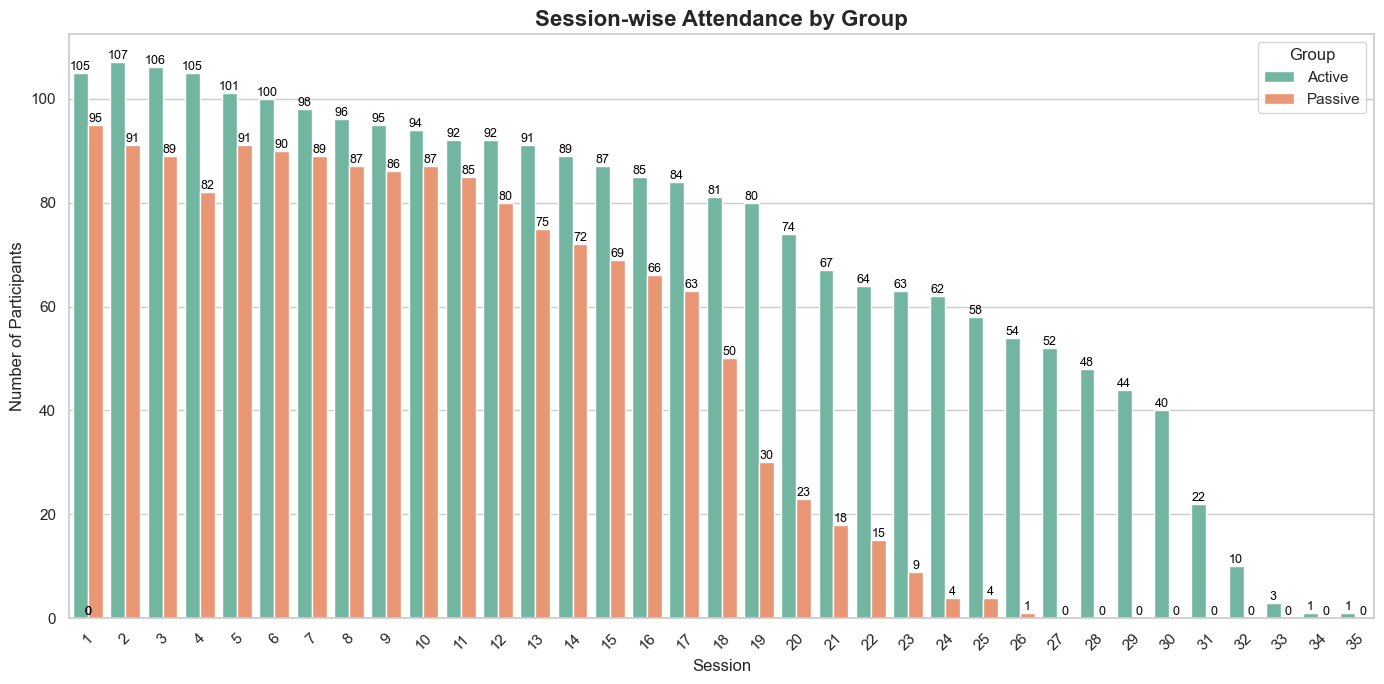

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the dataframe to long format for seaborn
plot_df = attendance_df.melt(id_vars='Session', 
                             value_vars=['Active Group Attendance', 'Passive Group Attendance'],
                             var_name='Group', value_name='Attendance')

# Rename for cleaner legend
plot_df['Group'] = plot_df['Group'].str.replace(' Group Attendance', '')

# Set modern style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=plot_df,
    x='Session',
    y='Attendance',
    hue='Group',
    palette='Set2'
)

# Add value labels on top of bars
for p in barplot.patches:
    height = p.get_height()
    if not pd.isna(height):
        barplot.annotate(f'{int(height)}', 
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=9, color='black')

# Customize
plt.title('Session-wise Attendance by Group', fontsize=16, weight='bold')
plt.xlabel('Session', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()

#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/PPT/SESSIONSATTENDED.png', dpi=300, bbox_inches='tight')
plt.show()



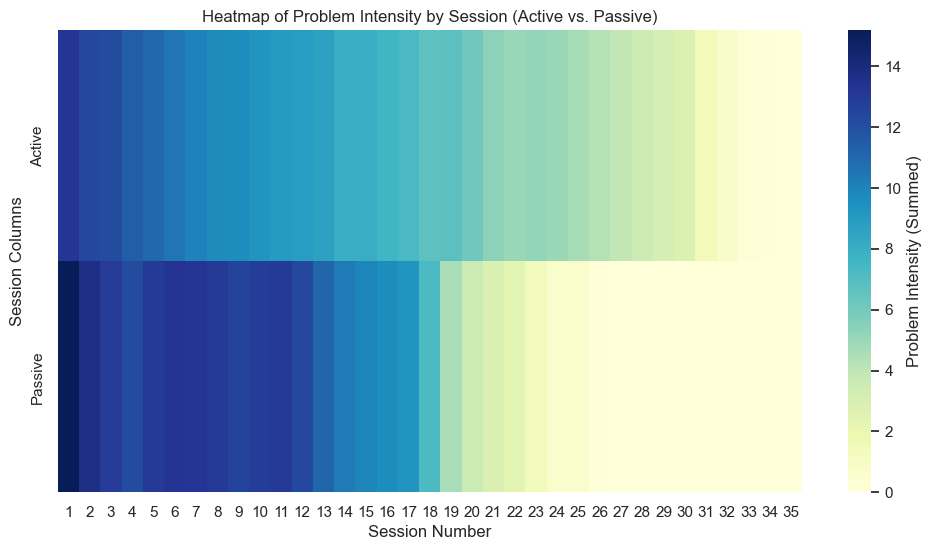

In [19]:
import numpy as np
# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(index=session_numbers[:-1], columns=["Active", "Passive"])

for i in range(len(session_numbers) - 1):  # Exclude last session
    session_start = session_numbers[i]
    
    # Identify session columns between TIME/SESSIONX and TIME/SESSION(X+1)
    session_cols = [col for col in session_columns if f"SESSION{session_start}_" in col]

    # Sum the values across these columns
    final_df1[f"SESSION {session_start} Sum"] = final_df1[session_cols].sum(axis=1)

    # Store averages for Active and Passive groups
    heatmap_data.loc[session_start, "Active"] = final_df1.loc[final_df1["GROUP"] == "Active", f"SESSION {session_start} Sum"].mean()
    heatmap_data.loc[session_start, "Passive"] = final_df1.loc[final_df1["GROUP"] == "Passive", f"SESSION {session_start} Sum"].mean()

# Convert all columns to numeric values, forcing errors to NaN
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

# Ensure all columns are numeric
if not np.issubdtype(heatmap_data.dtypes, np.number):
    heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap without annotations (values in the cells)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Problem Intensity (Summed)'})
plt.title("Heatmap of Problem Intensity by Session (Active vs. Passive)")
plt.xlabel("Session Number")
plt.ylabel("Session Columns")
plt.show()


In [20]:
import pandas as pd

# Load dataset


# Define correct session column names
session_cols = [f"TIME/SESSION{i}" for i in range(1, 36)]
valid_session_cols = [col for col in session_cols if col in final_df1.columns]  # Ensure columns exist

# Count attended sessions
final_df1["Sessions_Attended"] = final_df1[valid_session_cols].notna().sum(axis=1)

# Separate Active and Passive groups
active_sessions = final_df1[final_df1["GROUP"] == "Active"][["ID", "Sessions_Attended"]]
passive_sessions = final_df1[final_df1["GROUP"] == "Passive"][["ID", "Sessions_Attended"]]

# Display summary statistics
print(active_sessions.describe())
print(passive_sessions.describe())


       Sessions_Attended
count         109.000000
mean           22.513761
std             9.203074
min             1.000000
25%            18.000000
50%            25.000000
75%            30.000000
max            35.000000
       Sessions_Attended
count          98.000000
mean           20.846939
std             5.708290
min             6.000000
25%            18.000000
50%            22.000000
75%            24.000000
max            31.000000


IDS THAT ATTENDED FROM SESSION 19 IN PASSIVE GROUP

In [21]:
import pandas as pd

# Assume final_df1 is your DataFrame

# Identify all session date columns dynamically (if needed)
session_columns = [col for col in final_df1.columns if "TIME/SESSION" in col]
session_columns.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))  # Ensure correct ordering

# Initialize a new column to count attendance for sessions 19 to 26
final_df1["Sessions_Attended_19_26"] = 0

# Loop through sessions 19 to 25. For each session i, consider the columns from TIME/SESSIONi to TIME/SESSION(i+1)
for i in range(19, 26):  # This will cover sessions 19 to 25 as start points
    session_start = f"TIME/SESSION{i}"
    session_end = f"TIME/SESSION{i+1}"
    
    # Get all columns between session_start and session_end
    # Note: This slice works if your DataFrame columns are ordered appropriately.
    cols_between = final_df1.loc[:, session_start:session_end].columns
    
    # Check if any value in the selected columns is nonzero. If yes, count that session as attended.
    final_df1["Sessions_Attended_19_26"] += (final_df1[cols_between].fillna(0) != 0).any(axis=1)

# Handle session 26 separately (as it is the last session in the range)
final_df1["Sessions_Attended_19_26"] += (final_df1[["TIME/SESSION26"]].fillna(0) != 0).any(axis=1)

# Now, filter only the Passive group and retrieve IDs where at least one session (from 19 to 26) was attended.
passive_ids_attended = final_df1.loc[
    (final_df1["GROUP"] == "Passive") & (final_df1["Sessions_Attended_19_26"] > 0),
    "ID"
].unique()

print("IDs in Passive group who attended sessions 19 to 26:")
print(passive_ids_attended)


IDs in Passive group who attended sessions 19 to 26:
['27' '37' '64' '9' '8' '11' '25' '104' '85' '71' '15' '79' '100' '10'
 '91' '13' '98' '3' '63' '92' '113' '14AA' '88' '114' '96' '125' '196'
 '187' '153' '217' '216']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\483747327.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="GROUP", y="Sessions_Attended", data=df_plot, palette=["blue", "red"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\483747327.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df1[final_df1["GROUP"] == "Active"]["Sessions_Attended"], label="Active", shade=True, color="blue")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\483747327.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df1[final_df1["GROUP"] == "Passive"]["Sessions_Attended"], label="Passive", shad

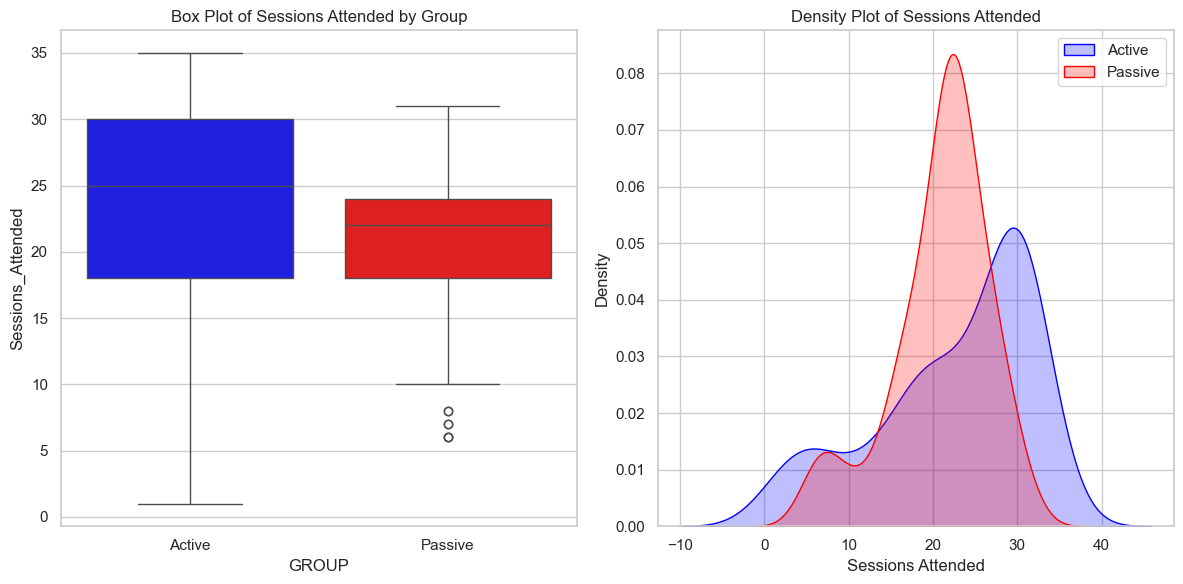

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Combine active and passive data for plotting
df_plot = final_df1[["ID", "Sessions_Attended", "GROUP"]]

# Box Plot (Better for distribution comparison)
plt.subplot(1, 2, 1)
sns.boxplot(x="GROUP", y="Sessions_Attended", data=df_plot, palette=["blue", "red"])
plt.title("Box Plot of Sessions Attended by Group")

# Density Plot (Shows distribution more smoothly)
plt.subplot(1, 2, 2)
sns.kdeplot(final_df1[final_df1["GROUP"] == "Active"]["Sessions_Attended"], label="Active", shade=True, color="blue")
sns.kdeplot(final_df1[final_df1["GROUP"] == "Passive"]["Sessions_Attended"], label="Passive", shade=True, color="red")
plt.title("Density Plot of Sessions Attended")
plt.xlabel("Sessions Attended")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


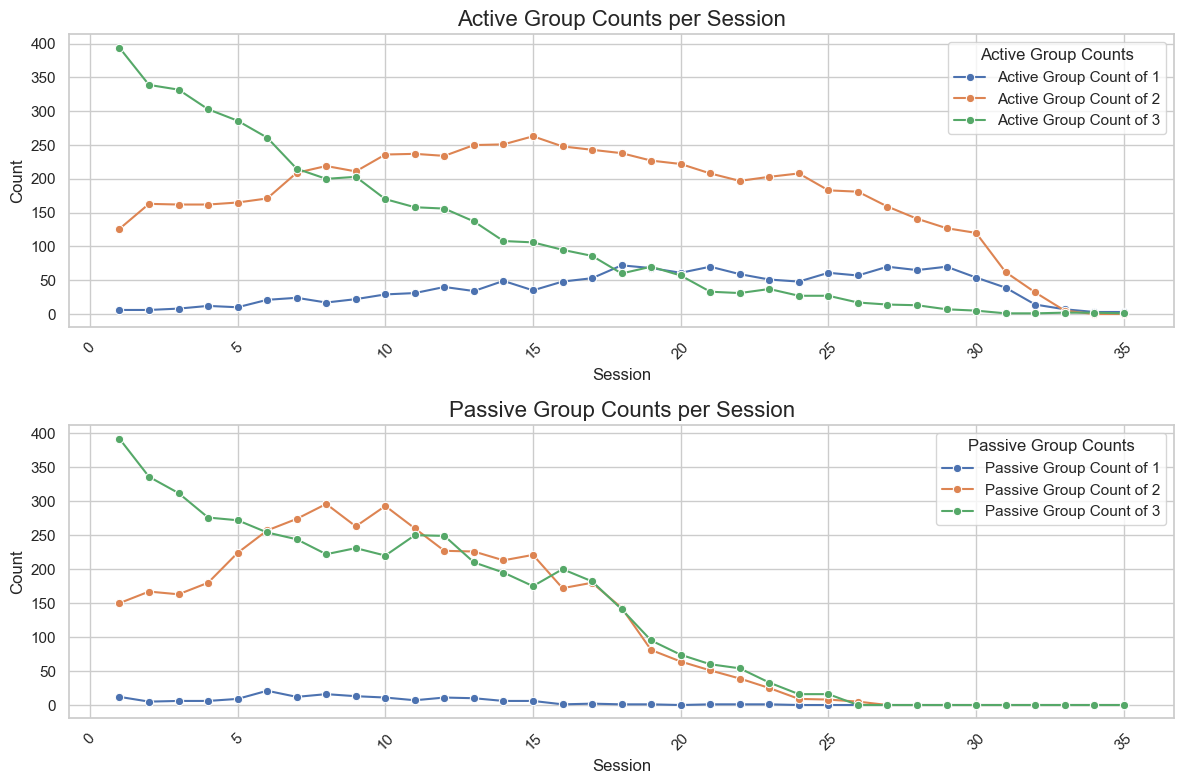

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plots
plt.figure(figsize=(12, 8))

# Active Group - Line Plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.lineplot(x='Session', y='Active Group Count of 1', data=session_counts_df, label='Active Group Count of 1', marker='o')
sns.lineplot(x='Session', y='Active Group Count of 2', data=session_counts_df, label='Active Group Count of 2', marker='o')
sns.lineplot(x='Session', y='Active Group Count of 3', data=session_counts_df, label='Active Group Count of 3', marker='o')

# Add titles and labels for Active Group plot
plt.title('Active Group Counts per Session', fontsize=16)
plt.xlabel('Session', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Active Group Counts')

# Passive Group - Line Plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.lineplot(x='Session', y='Passive Group Count of 1', data=session_counts_df, label='Passive Group Count of 1', marker='o')
sns.lineplot(x='Session', y='Passive Group Count of 2', data=session_counts_df, label='Passive Group Count of 2', marker='o')
sns.lineplot(x='Session', y='Passive Group Count of 3', data=session_counts_df, label='Passive Group Count of 3', marker='o')

# Add titles and labels for Passive Group plot
plt.title('Passive Group Counts per Session', fontsize=16)
plt.xlabel('Session', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Passive Group Counts')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


ACTIVE AND PASSIVE GROUP

In [24]:
# List of child IDs
child_ids = [
    136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 
    159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 
    184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 231, 232, 233, 219, 235, 209, 210, 238, 239, 
    240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251
]

# Function to assign 'C' for children and 'A' for adults based on ID
final_df1['AGE'] = final_df1['ID'].apply(lambda x: 'C' if x in child_ids else 'A')

# Check the first few rows to ensure it has worked correctly
print(final_df1[['ID', 'AGE']].head())


   ID AGE
0  39   A
1  76   A
2  24   A
3   4   A
4   7   A


In [25]:
# Ensure ID column is numeric
final_df1['ID'] = pd.to_numeric(final_df1['ID'], errors='coerce')

# Assign 'C' for children and 'A' for adults
final_df1['AGE'] = final_df1['ID'].apply(lambda x: 'C' if x in child_ids else 'A')

# Verify if classification worked correctly
print(final_df1[['ID', 'AGE']].value_counts())  # Check distribution of 'C' and 'A'
#print(final_df1.head())  # View first few rows


ID     AGE
136.0  C      2
165.0  C      2
179.0  C      2
177.0  C      2
64.0   A      2
             ..
103.0  A      1
104.0  A      1
105.0  A      1
106.0  A      1
251.0  C      1
Name: count, Length: 194, dtype: int64


In [26]:
# Count occurrences of each ID
id_counts = final_df1['ID'].value_counts()

# Filter IDs that appear exactly 2 times
ids_with_two_counts = id_counts[id_counts == 2].index

# Display IDs with a count of 2
print("IDs appearing exactly 2 times:")
print(ids_with_two_counts.tolist())


IDs appearing exactly 2 times:
[177.0, 165.0, 179.0, 136.0, 64.0]


APPLYING WEIGHTS

In [28]:
final_df2 = final_df1
final_df2.head()

ID   GROUP ENROLMENTDATE INITIALCAREPLAN TIME/SESSION1  \
0  39.0  Active     19/4/2022             3x4  10:30am 19/4   
1  76.0  Active          19/4             3x4  11:40am 19/4   
2  24.0  Active          19/4             3x4  12:20pm 19/4   
3   4.0  Active          19/4             3x4  12:55pm 19/4   
4   7.0  Active          19/4             3x4   1:05PM 19/4   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  ...  \
0                         0                      0                   0  ...   
1                         0                      0                   0  ...   
2                         0                      0                   0  ...   
3                         0                      0                   0  ...   
4                         0                      0                   0  ...   

   SESSION 29 Sum  SESSION 30 Sum  SESSION 31 Sum  SESSION 32 Sum  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   SESSION 33 Sum  SESSION 34 Sum  SESSION 35 Sum  Sessions_Attended  \
0               0               0               0                  4   
1               0               0               0                  3   
2               0               0               0                 27   
3               0               0               0                 18   
4               0               0               0                 25   

   Sessions_Attended_19_26  AGE  
0                        0    A  
1                        0    A  
2                        8    A  
3                        0    A  
4                        7    A  

[5 rows x 1899 columns]

In [29]:
import pandas as pd

# Create a new dataframe with the same structure as final_df1
weighted_df = final_df2.copy()

 #Iterate over column names and apply the transformation based on conditions
for col in final_df2.columns:
    if any(f"C{i}" in col for i in [1, 2]):  # If column name contains C1 or C2, multiply by 3
        weighted_df[col] = final_df2[col] * 3
    elif any(f"C{i}" in col for i in [3, 4, 5, 6, 7]):  # If column name contains C3-C7, multiply by 2
        weighted_df[col] = final_df2[col] * 2


In [30]:
pd.set_option("display.max_columns", None)
weighted_df.head(10)

ID   GROUP ENROLMENTDATE INITIALCAREPLAN  TIME/SESSION1  \
0  39.0  Active     19/4/2022             3x4   10:30am 19/4   
1  76.0  Active          19/4             3x4   11:40am 19/4   
2  24.0  Active          19/4             3x4   12:20pm 19/4   
3   4.0  Active          19/4             3x4   12:55pm 19/4   
4   7.0  Active          19/4             3x4    1:05PM 19/4   
5  34.0  Active          19/4             3x4    1:20pm 19/4   
6  73.0  Active          20/4             3x4   10:00am 20/4   
7  86.0  Active          20/4             3x4   10:40am 20/4   
8  33.0  Active          20/4             3x4  12:30pm 20/4    
9   2.0  Active          20/4            3x4      12:35 20/4   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   
5                         0                              0   
6                         0                              0   
7                         0                              3   
8                         0                              3   
9                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  \
0                         0                      0                   0   
1                         0                      0                   0   
2                         0                      0                   0   
3                         0                      0                   0   
4                         0                      0                   0   
5                         0                      0                   0   
6                         0                      0                   0   
7                         0                      0                   0   
8                         0                      0                   0   
9                         0                      0                   0   

   TIME/SESSION1_C1ASI  TIME/SESSION1_C1ASL  TIME/SESSION1_C1ASR  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   
5                    0                    0                    0   
6                    0                    0                    0   
7                    0                    0                    0   
8                    0                    0                    0   
9                    0                    0                    0   

   TIME/SESSION1_C1PIL  TIME/SESSION1_C1PIR  TIME/SESSION1_C2ARP  \
0                    6                    0                    0   
1                    0                    9                    0   
2                    9                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   
5                    0                    9                    0   
6                    0                    9                    0   
7                    0                    0                    0   
8                    0                    9                    0   
9                    0                    0                    0   

   TIME/SESSION1_C2BL  TIME/SESSION1_C2BR  TIME/SESSION1_C3BL  \
0                   0                   9                   0   
1                   6                   0                   0   
2                   0                   0                   0   
3                   9                   0   

In [ ]:

weighted_df.to_csv("C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/DATA_CHANGED/MERGED_WEIGHTED.csv", index=False)

In [31]:
# Rename only columns that are exactly like "TIME/SESSION1", "TIME/SESSION2", ..., "TIME/SESSION35"
new_columns = {}
for col in weighted_df.columns:
    if col.startswith("TIME/SESSION") and "_" not in col:
        new_columns[col] = col.replace("/", "_")

# Apply the renaming
weighted_df.rename(columns=new_columns, inplace=True)


CALCULATING WEIGHTED SUM FOR EACH SESSION

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Ensure 'GROUP' and 'AGE' columns are treated as categorical
weighted_df["GROUP"] = weighted_df["GROUP"].astype(str)
weighted_df["AGE"] = weighted_df["AGE"].astype(str)  # Assuming 'A' for Adult, 'C' for Child

# Extract all session-related columns dynamically for sessions up to 35
session_columns = [col for col in weighted_df.columns if col.startswith("TIME/SESSION")]

# Extract session numbers dynamically (session 1 to 35)
session_numbers = sorted(set(int(re.search(r"(\d+)", col).group()) for col in session_columns if re.search(r"(\d+)", col) and int(re.search(r"(\d+)", col).group()) <= 35))

# Create a new column for the sum for each session for each ID (assumed to be rows)
for session in session_numbers:
    session_cols = [col for col in session_columns if f"TIME/SESSION{session}_" in col]
    
    # Calculate the sum of the session columns for each row (ID)
    weighted_df[f"Session_{session}_Sum"] = weighted_df[session_cols].sum(axis=1)

# Check the new columns created
(weighted_df.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\3336680051.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df[f"Session_{session}_Sum"] = weighted_df[session_cols].sum(axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\3336680051.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df[f"Session_{session}_Sum"] = weighted_df[session_cols].sum(axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\3336680051.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

ID   GROUP ENROLMENTDATE INITIALCAREPLAN TIME_SESSION1  \
0  39.0  Active     19/4/2022             3x4  10:30am 19/4   
1  76.0  Active          19/4             3x4  11:40am 19/4   
2  24.0  Active          19/4             3x4  12:20pm 19/4   
3   4.0  Active          19/4             3x4  12:55pm 19/4   
4   7.0  Active          19/4             3x4   1:05PM 19/4   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  \
0                         0                      0                   0   
1                         0                      0                   0   
2                         0                      0                   0   
3                         0                      0                   0   
4                         0                      0                   0   

   TIME/SESSION1_C1ASI  TIME/SESSION1_C1ASL  TIME/SESSION1_C1ASR  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C1PIL  TIME/SESSION1_C1PIR  TIME/SESSION1_C2ARP  \
0                    6                    0                    0   
1                    0                    9                    0   
2                    9                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C2BL  TIME/SESSION1_C2BR  TIME/SESSION1_C3BL  \
0                   0                   9                   0   
1                   6                   0                   0   
2                   0                   0                   0   
3                   9                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C3BR  TIME/SESSION1_C4  TIME/SESSION1_C4BL  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   TIME/SESSION1_C4BR  TIME/SESSION1_C5BL  TIME/SESSION1_C5BR  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C6BL  TIME/SESSION1_C6BR  TIME/SESSION1_C7BL  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   6                   0   
3                   0                   0                   0   
4                   0                   6                   0   

   TIME/SESSION1_CT6BR  TIME/SESSION1_L1BILAT  TIME/SESSION1_L1BL  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   TIME/SESSION1_L1BR  

FORMATTING DATES

In [33]:
#df = pd.read_csv('MERGED_WEIGHTED.csv')
df = weighted_df
pd.set_option("display.max_columns", None)
df.head(5)

ID   GROUP ENROLMENTDATE INITIALCAREPLAN TIME_SESSION1  \
0  39.0  Active     19/4/2022             3x4  10:30am 19/4   
1  76.0  Active          19/4             3x4  11:40am 19/4   
2  24.0  Active          19/4             3x4  12:20pm 19/4   
3   4.0  Active          19/4             3x4  12:55pm 19/4   
4   7.0  Active          19/4             3x4   1:05PM 19/4   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  \
0                         0                      0                   0   
1                         0                      0                   0   
2                         0                      0                   0   
3                         0                      0                   0   
4                         0                      0                   0   

   TIME/SESSION1_C1ASI  TIME/SESSION1_C1ASL  TIME/SESSION1_C1ASR  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C1PIL  TIME/SESSION1_C1PIR  TIME/SESSION1_C2ARP  \
0                    6                    0                    0   
1                    0                    9                    0   
2                    9                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C2BL  TIME/SESSION1_C2BR  TIME/SESSION1_C3BL  \
0                   0                   9                   0   
1                   6                   0                   0   
2                   0                   0                   0   
3                   9                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C3BR  TIME/SESSION1_C4  TIME/SESSION1_C4BL  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   TIME/SESSION1_C4BR  TIME/SESSION1_C5BL  TIME/SESSION1_C5BR  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C6BL  TIME/SESSION1_C6BR  TIME/SESSION1_C7BL  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   6                   0   
3                   0                   0                   0   
4                   0                   6                   0   

   TIME/SESSION1_CT6BR  TIME/SESSION1_L1BILAT  TIME/SESSION1_L1BL  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   TIME/SESSION1_L1BR  

In [34]:
import pandas as pd
import re


# Store the original data types
original_dtypes = df.dtypes.copy()

# Identify columns that match "TIME/SESSION1" to "TIME/SESSION35" exactly
time_columns = [col for col in df.columns if re.match(r"TIME_SESSION[1-9]$|TIME_SESSION[1-3][0-9]$", col)]

# Function to clean and standardize dates
def clean_date(date_str):
    if pd.isna(date_str) or date_str.strip() == "":
        return None  # Handle missing values

    # Remove time (e.g., "2:45pm 25/4" → "25/4")
    date_str = re.sub(r"\b\d{1,2}:\d{2}(?:am|pm)?\b", "", date_str).strip()

    # Convert different separators to uniform format (e.g., "23-04-2025" → "23/04/2025")
    date_str = date_str.replace("-", "/")

    # Extract day and month, ignore existing year
    match = re.search(r"(\d{1,2})/(\d{1,2})", date_str)
    if match:
        day, month = match.groups()
        return f"{int(day):02d}-{int(month):02d}-2022"  # Standardize to DD-MM-YYYY with 2022

    return None  # Return None if no valid date is found

# Apply function only to the relevant columns
for col in time_columns:
    df[col] = df[col].astype(str).apply(clean_date)

# Restore original data types for non-date columns
for col in df.columns:
    if col not in time_columns:
        df[col] = df[col].astype(original_dtypes[col])




In [35]:
from datetime import datetime

# Step 1: Identify session columns
session_date_cols = [f'TIME_SESSION{i}' for i in range(1, 36) if f'TIME_SESSION{i}' in df.columns]

# Step 2: Convert and keep DD-MM-YYYY format
for col in session_date_cols:
    new_col = col.replace('TIME_SESSION', 'SESSION') + '_DATE'
    df[new_col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce').dt.strftime('%d-%m-%Y')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\63525813.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce').dt.strftime('%d-%m-%Y')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\63525813.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce').dt.strftime('%d-%m-%Y')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31404\63525813.py:9: PerformanceWarning: DataFrame is highly fragmented.  T

ID   GROUP ENROLMENTDATE INITIALCAREPLAN TIME_SESSION1  \
0  39.0  Active     19/4/2022             3x4    19-04-2022   
1  76.0  Active          19/4             3x4    19-04-2022   
2  24.0  Active          19/4             3x4    19-04-2022   
3   4.0  Active          19/4             3x4    19-04-2022   
4   7.0  Active          19/4             3x4    19-04-2022   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  \
0                         0                      0                   0   
1                         0                      0                   0   
2                         0                      0                   0   
3                         0                      0                   0   
4                         0                      0                   0   

   TIME/SESSION1_C1ASI  TIME/SESSION1_C1ASL  TIME/SESSION1_C1ASR  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C1PIL  TIME/SESSION1_C1PIR  TIME/SESSION1_C2ARP  \
0                    6                    0                    0   
1                    0                    9                    0   
2                    9                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C2BL  TIME/SESSION1_C2BR  TIME/SESSION1_C3BL  \
0                   0                   9                   0   
1                   6                   0                   0   
2                   0                   0                   0   
3                   9                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C3BR  TIME/SESSION1_C4  TIME/SESSION1_C4BL  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   TIME/SESSION1_C4BR  TIME/SESSION1_C5BL  TIME/SESSION1_C5BR  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C6BL  TIME/SESSION1_C6BR  TIME/SESSION1_C7BL  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   6                   0   
3                   0                   0                   0   
4                   0                   6                   0   

   TIME/SESSION1_CT6BR  TIME/SESSION1_L1BILAT  TIME/SESSION1_L1BL  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   TIME/SESSION1_L1BR  

In [38]:
import pandas as pd

# 1. Build lists of relevant columns
sum_cols = [f'Session_{i}_Sum' for i in range(1, 36)]
date_cols = [f'TIME_SESSION{i}' for i in range(1, 36)]

# 2. Melt sum columns
sum_long = df[['ID'] + sum_cols].melt(id_vars='ID', 
                                      var_name='SessionSumCol', 
                                      value_name='SessionScore')

# 3. Extract session number
sum_long['SessionNumber'] = sum_long['SessionSumCol'].str.extract(r'Session_(\d+)_Sum').astype(int)

# 4. Keep only attended sessions (score > 0)
sum_long = sum_long[sum_long['SessionScore'] > 0]

# 5. Get corresponding session dates
date_long = df[['ID'] + date_cols].melt(id_vars='ID',
                                        var_name='SessionDateCol',
                                        value_name='SessionDate')
date_long['SessionNumber'] = date_long['SessionDateCol'].str.extract(r'TIME_SESSION(\d+)').astype(int)

# 6. Merge scores with dates
merged = pd.merge(sum_long, date_long, on=['ID', 'SessionNumber'], how='left')

# 7. Convert dates (assumed format is DD-MM-YYYY)
merged['SessionDate'] = pd.to_datetime(merged['SessionDate'], format='%d-%m-%Y', errors='coerce')

# 8. Calculate week number relative to first session per ID
merged = merged.dropna(subset=['SessionDate'])  # drop invalid dates
merged = merged.sort_values(by=['ID', 'SessionDate'])
merged['WeekNumber'] = merged.groupby('ID')['SessionDate'].transform(
    lambda x: ((x - x.min()).dt.days // 7) + 1
)

# 9. Group by ID and week number
summary = merged.groupby(['ID', 'WeekNumber']).agg(
    SessionsAttended=('SessionNumber', 'count'),
    SessionsList=('SessionNumber', lambda x: sorted(x.tolist()))
).reset_index()

# If running in your own environment like Jupyter:
print(summary.head(20))  # Show first 10 rows





     ID  WeekNumber  SessionsAttended  SessionsList
0   2.0         1.0                 4  [1, 2, 3, 4]
1   2.0         2.0                 2        [5, 6]
2   2.0         3.0                 2        [7, 8]
3   2.0         4.0                 3   [9, 10, 11]
4   2.0         5.0                 2      [12, 13]
5   2.0         6.0                 3  [14, 15, 16]
6   2.0         7.0                 2      [17, 18]
7   2.0         8.0                 2      [19, 20]
8   2.0         9.0                 1          [21]
9   2.0        10.0                 2      [22, 23]
10  2.0        11.0                 2      [24, 25]
11  2.0        12.0                 1          [26]
12  2.0        13.0                 2      [27, 28]
13  3.0         1.0                 2        [1, 2]
14  3.0         3.0                 1           [3]
15  3.0         4.0                 1           [4]
16  3.0         5.0                 2        [5, 6]
17  3.0         6.0                 2        [7, 8]
18  3.0     

In [41]:
import numpy as np
import pandas as pd

def clean_session_list(x):
    if isinstance(x, float) and pd.isna(x):  # handles NaN
        return ''
    if isinstance(x, list):
        session_nums = [int(s) for s in x if pd.notnull(s) and str(s).isdigit()]
    else:
        session_nums = [int(s) for s in str(x).split(',') if s.strip().isdigit()]
    return ','.join(map(str, sorted(session_nums)))

# Clean session list
summary['SessionsList'] = summary['SessionsList'].apply(clean_session_list)

# ✅ DO NOT filter WeekNumber <= 13 here — keep all weeks
# summary = summary[summary['WeekNumber'] <= 13]  <-- removed
summary['WeekNumber'] = summary['WeekNumber'].astype(int)
# Dynamically get max week number
max_week = summary['WeekNumber'].max()

# Pivot session list and counts
pivot_sessions = summary.pivot(index='ID', columns='WeekNumber', values='SessionsList')
pivot_counts = summary.pivot(index='ID', columns='WeekNumber', values='SessionsAttended')

# Rename columns dynamically based on max week
pivot_sessions.columns = [f'WEEK{int(col)}_SESSION' for col in pivot_sessions.columns]
pivot_counts.columns = [f'WEEK_{int(col)}' for col in pivot_counts.columns]

# Fill missing columns up to max_week
for i in range(1, max_week + 1):
    pivot_sessions[f'WEEK{i}_SESSION'] = pivot_sessions.get(f'WEEK{i}_SESSION', '')
    pivot_counts[f'WEEK_{i}'] = pivot_counts.get(f'WEEK_{i}', 0)

# Combine and merge with main dataframe
weekly_df = pd.concat([pivot_counts, pivot_sessions], axis=1).reset_index()
df_final = pd.merge(df, weekly_df, on='ID', how='left')

# Show just weekly columns
weekly_cols = [col for col in df_final.columns if col.startswith('WEEK_') or 'WEEK' in col]
df_final[weekly_cols].head()


WEEK_1  WEEK_2  WEEK_3  WEEK_4  WEEK_5  WEEK_6  WEEK_7  WEEK_8  WEEK_9  \
0     3.0     1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     4.0     1.0     NaN     1.0     4.0     2.0     1.0     3.0     3.0   
3     3.0     2.0     NaN     4.0     2.0     2.0     1.0     2.0     2.0   
4     3.0     2.0     NaN     4.0     2.0     2.0     1.0     2.0     2.0   

   WEEK_10  WEEK_11  WEEK_12  WEEK_13  WEEK_14  WEEK_15  WEEK_16  WEEK_17  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      1.0      4.0      NaN      2.0      1.0      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      1.0      2.0      2.0      2.0      NaN      NaN      NaN      NaN   

   WEEK_18  WEEK_19  WEEK_20  WEEK_22  WEEK_21 WEEK1_SESSION WEEK2_SESSION  \
0      NaN      NaN      NaN      NaN      0.0         1,2,3             4   
1      NaN      NaN      NaN      NaN      0.0         1,2,3           NaN   
2      NaN      NaN      NaN      NaN      0.0       1,2,3,4             5   
3      NaN      NaN      NaN      NaN      0.0         1,2,3           4,5   
4      NaN      NaN      NaN      NaN      0.0         1,2,3           4,5   

  WEEK3_SESSION WEEK4_SESSION WEEK5_SESSION WEEK6_SESSION WEEK7_SESSION  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN             6      7,8,9,10         11,12            13   
3           NaN       6,7,8,9         10,11         12,13            14   
4           NaN       6,7,8,9         10,11         12,13            14   

  WEEK8_SESSION WEEK9_SESSION WEEK10_SESSION WEEK11_SESSION WEEK12_SESSION  \
0           NaN           NaN            NaN            NaN            NaN   
1           NaN           NaN            NaN            NaN            NaN   
2      14,15,16      17,18,19             20    21,22,23,24            NaN   
3         15,16         17,18            NaN            NaN            NaN   
4         15,16         17,18             19          20,21          22,23   

  WEEK13_SESSION WEEK14_SESSION WEEK15_SESSION WEEK16_SESSION WEEK17_SESSION  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2          25,26             27            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4          24,25            NaN            NaN            NaN            NaN   

  WEEK18_SESSION WEEK19_SESSION WEEK20_SESSION WEEK22_SESSION WEEK21_SESSION  
0            NaN            NaN            NaN            NaN                 
1            NaN            NaN            NaN            NaN                 
2            NaN            NaN            NaN            NaN                 
3            NaN            NaN            NaN            NaN                 
4            NaN            NaN            NaN            NaN

In [42]:
# Step 1: Get rows beyond week 13
beyond_13 = summary[summary['WeekNumber'] > 13]

# Step 2: Get unique IDs
ids_beyond_13 = beyond_13['ID'].unique()
num_ids = len(ids_beyond_13)

# Step 3: For each such ID, list their WeekNumber and SessionsList
sessions_beyond_13 = beyond_13[['ID', 'WeekNumber', 'SessionsList']].sort_values(by=['ID', 'WeekNumber'])

# Display results
print(f"✅ Number of IDs who attended beyond Week 13: {num_ids}")
print("🆔 IDs:", ids_beyond_13.tolist())
print("\n📋 Sessions attended in Weeks >13:")
print(sessions_beyond_13)


✅ Number of IDs who attended beyond Week 13: 41
🆔 IDs: [11.0, 12.0, 16.0, 18.0, 19.0, 20.0, 23.0, 24.0, 33.0, 34.0, 52.0, 69.0, 75.0, 77.0, 83.0, 85.0, 86.0, 95.0, 96.0, 104.0, 107.0, 109.0, 123.0, 139.0, 141.0, 142.0, 147.0, 150.0, 151.0, 152.0, 158.0, 160.0, 167.0, 172.0, 177.0, 178.0, 179.0, 180.0, 182.0, 186.0, 203.0]

📋 Sessions attended in Weeks >13:
         ID  WeekNumber SessionsList
113    11.0          14        24,25
118    12.0          14            7
119    12.0          15       8,9,10
120    12.0          16           11
121    12.0          17        12,13
122    12.0          18     14,15,16
123    12.0          19        17,18
124    12.0          20        19,20
160    16.0          14           18
182    18.0          14           21
195    19.0          14        28,29
207    20.0          14        26,27
225    23.0          14           30
237    24.0          14           27
271    33.0          14        27,28
272    33.0          15        29,30
284    34.0 

In [43]:
# Filter for weeks > 13
weeks_after_13 = summary[summary['WeekNumber'] > 13]

# Group by WeekNumber and count unique IDs
weekly_counts_after_13 = weeks_after_13.groupby('WeekNumber')['ID'].nunique().reset_index()
weekly_counts_after_13.columns = ['WeekNumber', 'NumIDs']

# Display
print("✅ Number of IDs attending each week after Week 13:")
print(weekly_counts_after_13)


✅ Number of IDs attending each week after Week 13:
   WeekNumber  NumIDs
0          14      32
1          15       8
2          16      10
3          17       2
4          18       2
5          19       3
6          20       2
7          22       1


In [44]:
# Loop through week numbers
for week in range(1, 20):
    session_col = f'WEEK{week}_SESSION'
    avg_col = f'WEEK{week}_AVERAGE'
    
    def compute_avg(row):
        try:
            session_nums = [int(s) for s in str(row[session_col]).split(',') if s.strip().isdigit()]
            session_scores = [row[f'Session_{n}_Sum'] for n in session_nums if f'Session_{n}_Sum' in row and pd.notnull(row[f'Session_{n}_Sum'])]
            return round(sum(session_scores) / len(session_scores), 2) if session_scores else None
        except:
            return None

    df_final[avg_col] = df_final.apply(compute_avg, axis=1)


AVERAGE SCORE PLOT

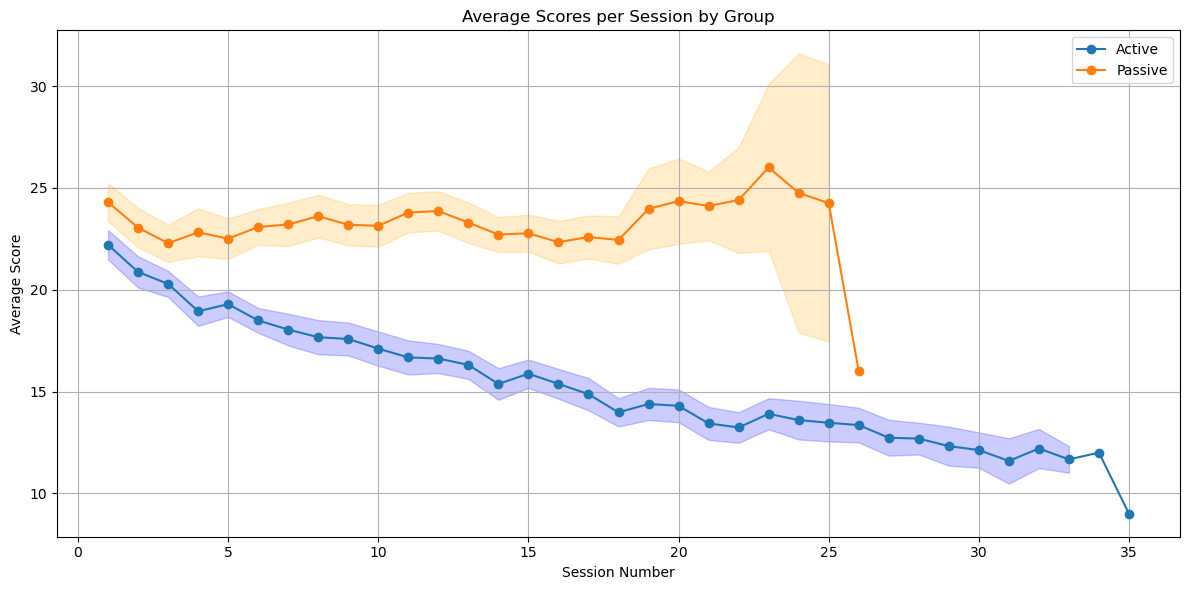

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reset to default style to avoid unexpected theme changes
plt.style.use('default')

# List of session columns
session_cols = [f'Session_{i}_Sum' for i in range(1, 36)]

# Create DataFrames to store averages and standard errors
avg_scores = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])
se_scores = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])

# Calculate averages and standard errors
for i, session in enumerate(session_cols, start=1):
    for group in ['Active', 'Passive']:
        values = df[df['GROUP'] == group][session]
        non_zero_values = values[values != 0]
        avg_scores.loc[i, group] = non_zero_values.mean()
        se_scores.loc[i, group] = non_zero_values.std(ddof=1) / np.sqrt(len(non_zero_values))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(avg_scores.index, avg_scores['Active'], label='Active', marker='o')
plt.plot(avg_scores.index, avg_scores['Passive'], label='Passive', marker='o')

# Add confidence intervals
for group, color in zip(['Active', 'Passive'], ['blue', 'orange']):
    mean = avg_scores[group].astype(float)
    se = se_scores[group].astype(float)
    plt.fill_between(avg_scores.index,
                     mean - 1.96 * se,
                     mean + 1.96 * se,
                     color=color,
                     alpha=0.2)

plt.xlabel("Session Number")
plt.ylabel("Average Score")
plt.title("Average Scores per Session by Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/AVERAGESCORES.png', dpi=300, bbox_inches='tight')
plt.show()


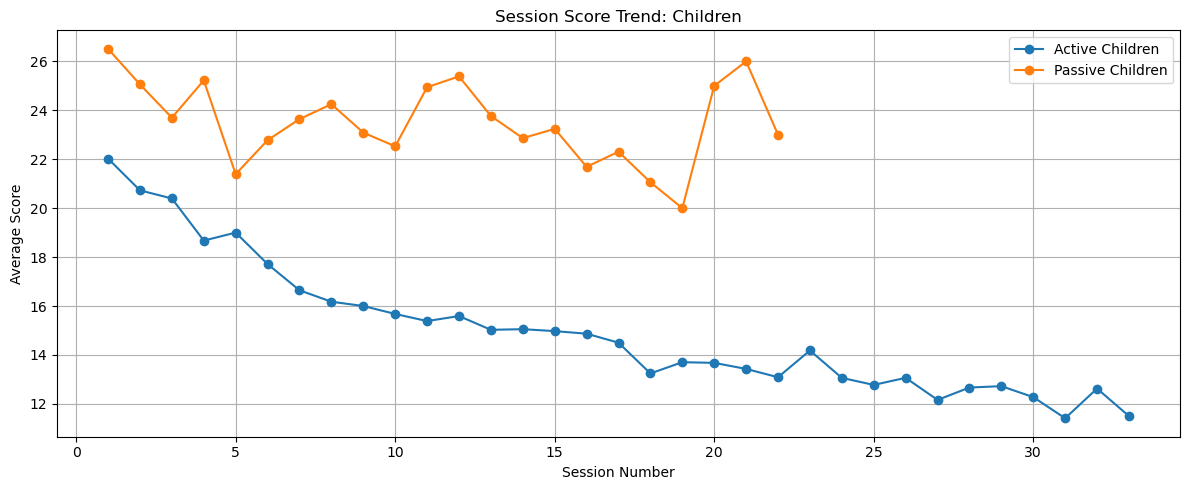

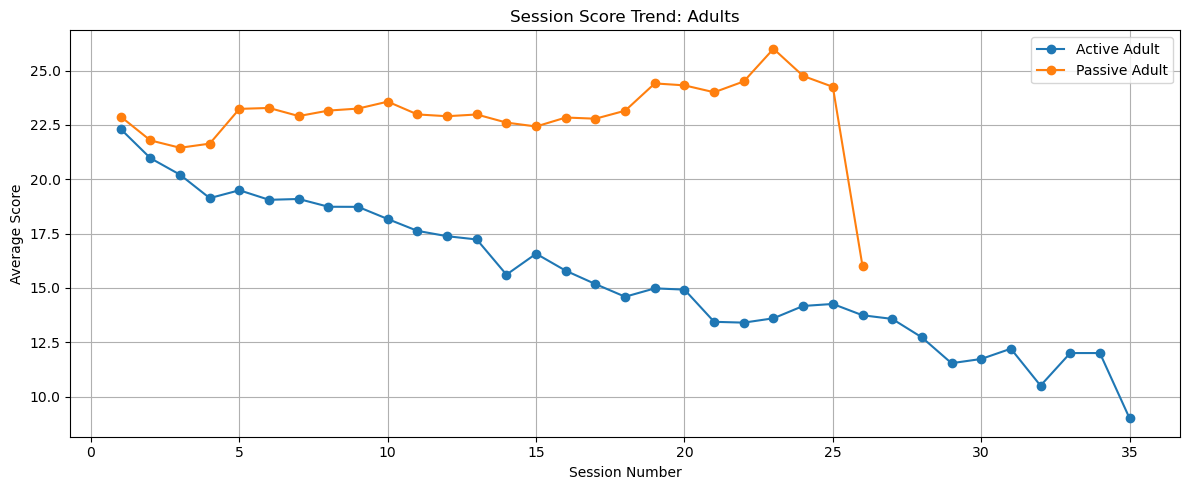

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Session columns
session_cols = [f'Session_{i}_Sum' for i in range(1, 36)]

# Create separate DataFrames to store averages
children_avg = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])
adult_avg = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])

# Loop through each session
for i, session in enumerate(session_cols, start=1):
    # Children
    for group in ['Active', 'Passive']:
        values_child = df[(df['GROUP'] == group) & (df['AGE'] == 'C')][session]
        children_avg.loc[i, group] = values_child[values_child != 0].mean()
    
    # Adult
    for group in ['Active', 'Passive']:
        values_adult = df[(df['GROUP'] == group) & (df['AGE'] == 'A')][session]
        adult_avg.loc[i, group] = values_adult[values_adult != 0].mean()

# Plot for Children
plt.figure(figsize=(12, 5))
plt.plot(children_avg.index, children_avg['Active'], label='Active Children', marker='o')
plt.plot(children_avg.index, children_avg['Passive'], label='Passive Children', marker='o')
plt.title('Session Score Trend: Children')
plt.xlabel('Session Number')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Adults
plt.figure(figsize=(12, 5))
plt.plot(adult_avg.index, adult_avg['Active'], label='Active Adult', marker='o')
plt.plot(adult_avg.index, adult_avg['Passive'], label='Passive Adult', marker='o')
plt.title('Session Score Trend: Adults')
plt.xlabel('Session Number')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


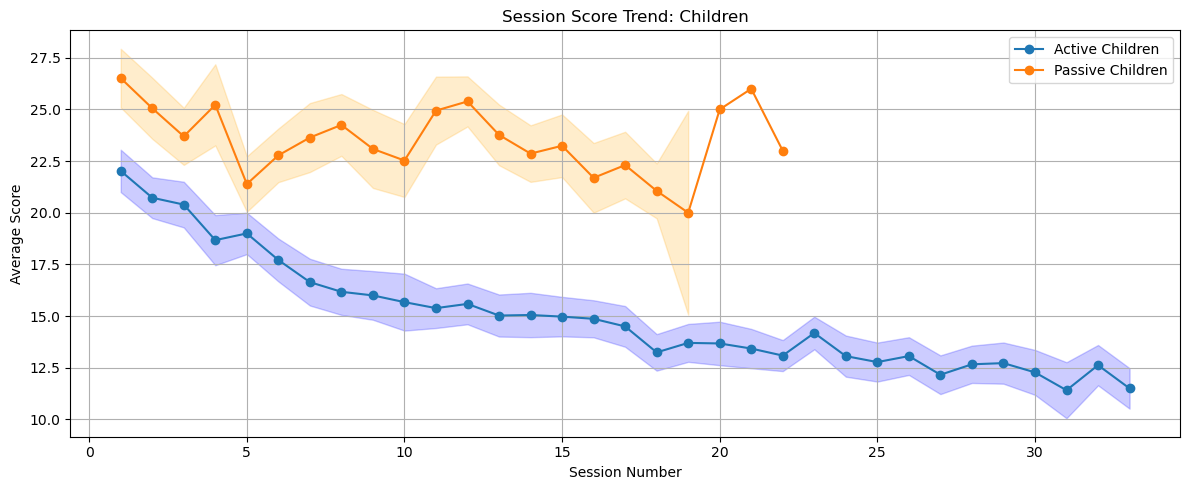

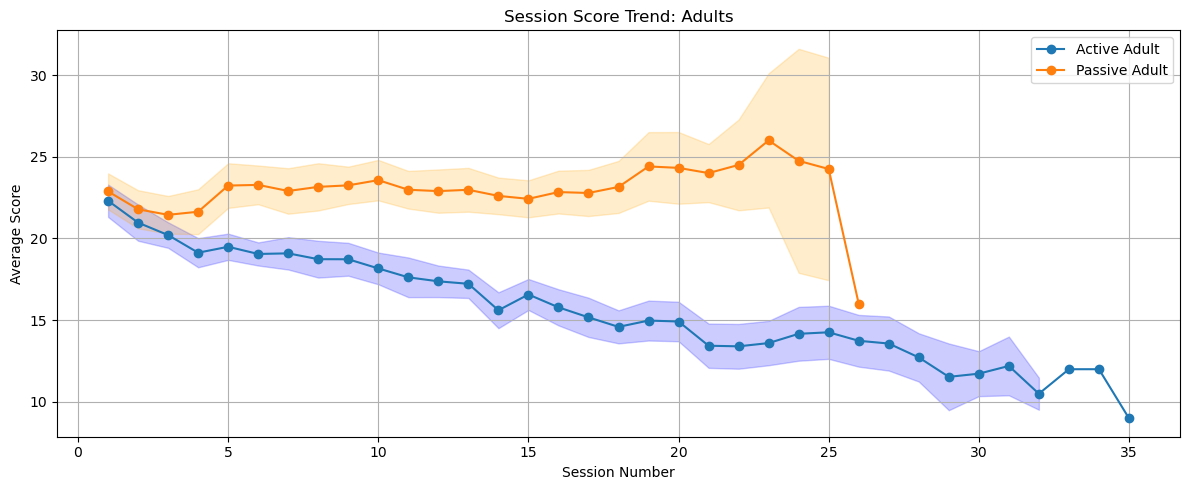

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reset style to default to avoid unexpected changes
plt.style.use('default')

# Session columns
session_cols = [f'Session_{i}_Sum' for i in range(1, 36)]

# Create DataFrames to store averages and standard errors
children_avg = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])
adult_avg = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])
children_se = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])
adult_se = pd.DataFrame(index=range(1, 36), columns=['Active', 'Passive'])

# Loop through each session and calculate mean and SE
for i, session in enumerate(session_cols, start=1):
    for group in ['Active', 'Passive']:
        # Children
        child_vals = df[(df['GROUP'] == group) & (df['AGE'] == 'C')][session]
        child_vals_nonzero = child_vals[child_vals != 0]
        children_avg.loc[i, group] = child_vals_nonzero.mean()
        children_se.loc[i, group] = child_vals_nonzero.std(ddof=1) / np.sqrt(len(child_vals_nonzero))
        
        # Adults
        adult_vals = df[(df['GROUP'] == group) & (df['AGE'] == 'A')][session]
        adult_vals_nonzero = adult_vals[adult_vals != 0]
        adult_avg.loc[i, group] = adult_vals_nonzero.mean()
        adult_se.loc[i, group] = adult_vals_nonzero.std(ddof=1) / np.sqrt(len(adult_vals_nonzero))

# --- Plot for Children ---
plt.figure(figsize=(12, 5))
for group, color in zip(['Active', 'Passive'], ['blue', 'orange']):
    mean = children_avg[group].astype(float)
    se = children_se[group].astype(float)
    plt.plot(mean.index, mean, label=f'{group} Children', marker='o')
    plt.fill_between(mean.index, mean - 1.96 * se, mean + 1.96 * se, color=color, alpha=0.2)

plt.title('Session Score Trend: Children')
plt.xlabel('Session Number')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/AVERAGESCORES_CHILDREN_SESSION.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Plot for Adults ---
plt.figure(figsize=(12, 5))
for group, color in zip(['Active', 'Passive'], ['blue', 'orange']):
    mean = adult_avg[group].astype(float)
    se = adult_se[group].astype(float)
    plt.plot(mean.index, mean, label=f'{group} Adult', marker='o')
    plt.fill_between(mean.index, mean - 1.96 * se, mean + 1.96 * se, color=color, alpha=0.2)

plt.title('Session Score Trend: Adults')
plt.xlabel('Session Number')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/AVERAGESCORES_ADULT_SESSION.png', dpi=300, bbox_inches='tight')
plt.show()


EXTRACTING FIRST MID AND LAST SCORES

In [48]:
import numpy as np
import pandas as pd

# Step 1: List of week average columns
week_avg_cols = [f'WEEK{i}_AVERAGE' for i in range(1, 21)]

# Step 2: Define functions

def get_first(row):
    # Directly take week 1 score (even if it's 0)
    return row.get('WEEK1_AVERAGE', np.nan)

def get_mid(row):
    # Search from Week 6 to Week 10
    for i in range(6, 15):  # Note: 11 because range is exclusive at the end
        val = row.get(f'WEEK{i}_AVERAGE', np.nan)
        if pd.notnull(val) and val != 0:
            return val
    return np.nan  # If none found

def get_last(row):
    # Start from Week 20 backwards to Week 1
    for i in range(20, 0, -1):
        val = row.get(f'WEEK{i}_AVERAGE', np.nan)
        if pd.notnull(val) and val != 0:
            return val
    return np.nan  # If none found

# Step 3: Apply functions to create new columns
df_final['FIRST'] = df_final.apply(get_first, axis=1)
df_final['MID'] = df_final.apply(get_mid, axis=1)
df_final['LAST'] = df_final.apply(get_last, axis=1)

# Step 4: Optional preview
print(df_final[['ID', 'FIRST', 'MID', 'LAST']].head(10))


     ID  FIRST    MID   LAST
0  39.0  23.33    NaN   9.00
1  76.0  22.00    NaN  22.00
2  24.0  21.75  19.50  13.00
3   4.0  18.67  16.00  12.00
4   7.0  19.00  20.50  12.00
5  34.0  24.67  17.67  11.33
6  73.0  24.00  20.00   9.00
7  86.0  23.00  18.00  13.00
8  33.0  23.80  19.25   9.50
9   2.0  21.00  10.67  16.00


In [49]:
# 1. Find IDs where FIRST is NaN or 0
first_issues = df_final[(df_final['FIRST'].isna()) | (df_final['FIRST'] == 0)][['ID', 'FIRST']]

# 2. Find IDs where MID is NaN or 0
mid_issues = df_final[(df_final['MID'].isna()) | (df_final['MID'] == 0)][['ID', 'MID']]

# 3. Find IDs where LAST is NaN or 0
last_issues = df_final[(df_final['LAST'].isna()) | (df_final['LAST'] == 0)][['ID', 'LAST']]

# 4. Print Results
print("\n⚠️ IDs with issues in FIRST:")
print(first_issues)

print("\n⚠️ IDs with issues in MID:")
print(mid_issues)

print("\n⚠️ IDs with issues in LAST:")
print(last_issues)



⚠️ IDs with issues in FIRST:
     ID  FIRST
14  NaN    NaN
15  NaN    NaN
42  NaN    NaN
54  NaN    NaN
142 NaN    NaN
143 NaN    NaN
145 NaN    NaN
198 NaN    NaN

⚠️ IDs with issues in MID:
        ID  MID
0     39.0  NaN
1     76.0  NaN
14     NaN  NaN
15     NaN  NaN
27    68.0  NaN
28    90.0  NaN
38    62.0  NaN
39    45.0  NaN
42     NaN  NaN
49    72.0  NaN
54     NaN  NaN
81   135.0  NaN
88   222.0  NaN
92   177.0  NaN
104  134.0  NaN
107  242.0  NaN
109   47.0  NaN
112   84.0  NaN
119   22.0  NaN
121   89.0  NaN
133   54.0  NaN
134   40.0  NaN
142    NaN  NaN
143    NaN  NaN
145    NaN  NaN
158  111.0  NaN
162  140.0  NaN
178  136.0  NaN
186  231.0  NaN
198    NaN  NaN

⚠️ IDs with issues in LAST:
     ID  LAST
14  NaN   NaN
15  NaN   NaN
42  NaN   NaN
54  NaN   NaN
142 NaN   NaN
143 NaN   NaN
145 NaN   NaN
198 NaN   NaN


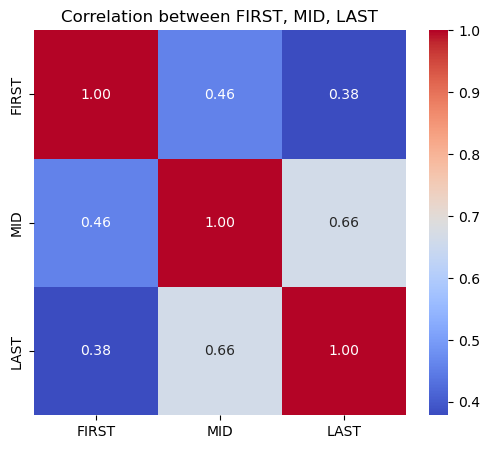

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1a: Calculate correlation matrix
correlation_matrix = df_final[['FIRST', 'MID', 'LAST']].corr()

# Step 1b: Plot correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between FIRST, MID, LAST')
plt.show()


CALCULATING SLOPE VARIABLES

     ID   SLOPE1  SLOPE2
0  39.0 -14.3300     NaN
1  76.0      NaN     NaN
2  24.0   0.2180 -1.2827
3   4.0  -0.7641 -4.0000
4   7.0   0.3779  0.5893


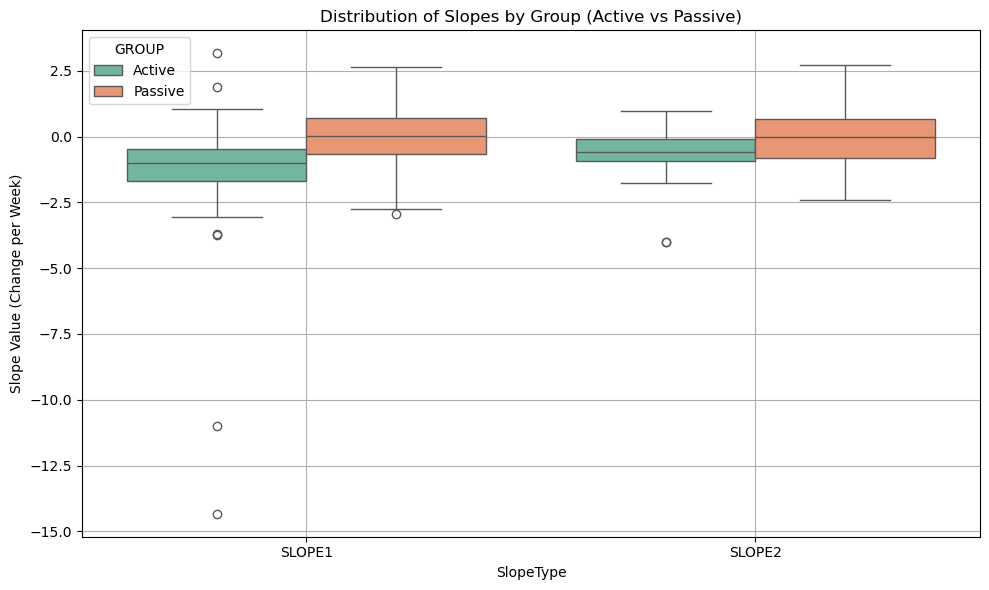

In [51]:
from scipy.stats import linregress
import numpy as np

# Weeks available
week_avg_cols = [f'WEEK{i}_AVERAGE' for i in range(1, 21)]

# Function to calculate slope1 (Weeks 1–6)
def calculate_slope1(row):
    weeks = []
    scores = []
    
    for w in range(1, 7):  # Weeks 1 to 6
        val = row.get(f'WEEK{w}_AVERAGE', np.nan)
        if pd.notnull(val) and val != 0:
            weeks.append(w)
            scores.append(val)
    
    if len(weeks) >= 2:
        slope, intercept, r_value, p_value, std_err = linregress(weeks, scores)
        return round(slope, 4)
    else:
        return np.nan

# Function to calculate slope2 (Weeks 7–20)
def calculate_slope2(row):
    weeks = []
    scores = []
    
    for w in range(7, 21):  # Weeks 7 to 20
        val = row.get(f'WEEK{w}_AVERAGE', np.nan)
        if pd.notnull(val) and val != 0:
            weeks.append(w)
            scores.append(val)
    
    if len(weeks) >= 2:
        slope, intercept, r_value, p_value, std_err = linregress(weeks, scores)
        return round(slope, 4)
    else:
        return np.nan

# Apply to your df_final
df_final['SLOPE1'] = df_final.apply(calculate_slope1, axis=1)
df_final['SLOPE2'] = df_final.apply(calculate_slope2, axis=1)

# Quick preview
print(df_final[['ID', 'SLOPE1', 'SLOPE2']].head())


import matplotlib.pyplot as plt
import seaborn as sns

# Filter and melt
df_slope = df_final[['GROUP', 'SLOPE1', 'SLOPE2']].melt(id_vars='GROUP', 
                                                        value_vars=['SLOPE1', 'SLOPE2'],
                                                        var_name='SlopeType',
                                                        value_name='SlopeValue')

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_slope, x='SlopeType', y='SlopeValue', hue='GROUP', palette='Set2')
plt.title('Distribution of Slopes by Group (Active vs Passive)')
plt.ylabel('Slope Value (Change per Week)')
plt.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/SLOPE_BOX.png', dpi=300, bbox_inches='tight')
plt.show()


In [52]:
# 1. Check where SLOPE1 or SLOPE2 is NaN
nan_rows = df_final[df_final[['SLOPE1', 'SLOPE2']].isna().any(axis=1)]

print("\n✅ IDs with NaN in SLOPE1 or SLOPE2:")
print(nan_rows[['ID', 'SLOPE1', 'SLOPE2']])

# 2. Check where SLOPE1 or SLOPE2 is 0
zero_rows = df_final[(df_final['SLOPE1'] == 0) | (df_final['SLOPE2'] == 0)]

print("\n✅ IDs with 0 value in SLOPE1 or SLOPE2:")
print(zero_rows[['ID', 'SLOPE1', 'SLOPE2']])

# 3. (Optional) How many?
print(f"\nTotal IDs with NaN slopes: {nan_rows.shape[0]}")
print(f"Total IDs with 0 slopes: {zero_rows.shape[0]}")



✅ IDs with NaN in SLOPE1 or SLOPE2:
        ID   SLOPE1  SLOPE2
0     39.0 -14.3300     NaN
1     76.0      NaN     NaN
14     NaN      NaN     NaN
15     NaN      NaN     NaN
27    68.0      NaN     NaN
28    90.0  -0.9286     NaN
38    62.0      NaN     NaN
39    45.0   1.0500     NaN
42     NaN      NaN     NaN
49    72.0   1.8820     NaN
54     NaN      NaN     NaN
68   207.0  -0.9523     NaN
80   218.0      NaN     NaN
81   135.0  -0.3300     NaN
83   147.0      NaN -0.9217
88   222.0      NaN     NaN
92   177.0  -2.2500     NaN
93   233.0  -3.7500     NaN
101  239.0  -3.0479     NaN
102  251.0  -2.2500     NaN
104  134.0  -0.5340     NaN
107  242.0 -11.0000     NaN
109   47.0   1.0000     NaN
112   84.0      NaN     NaN
119   22.0   0.9500     NaN
121   89.0   0.1250     NaN
133   54.0   0.0000     NaN
134   40.0      NaN     NaN
139   74.0   0.5571     NaN
142    NaN      NaN     NaN
143    NaN      NaN     NaN
145    NaN      NaN     NaN
158  111.0      NaN     NaN
162  140.0 

In [53]:
# 1. Remove NaNs in SLOPE1 or SLOPE2
df_final = df_final.dropna(subset=['SLOPE1', 'SLOPE2'])



print(f"✅ Final dataset shape: {df_final.shape}")


✅ Final dataset shape: (166, 2037)


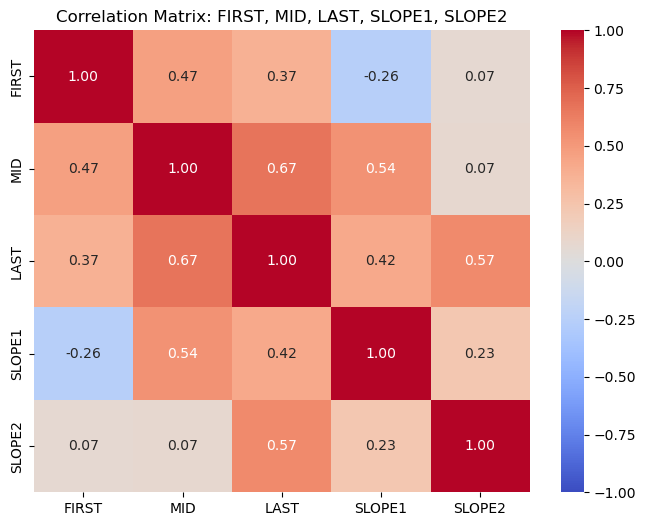

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select the columns
correlation_data = df_final[['FIRST', 'MID', 'LAST', 'SLOPE1', 'SLOPE2']]

# Step 2: Drop rows where everything is NaN
correlation_data = correlation_data.dropna()

# Step 3: Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix: FIRST, MID, LAST, SLOPE1, SLOPE2')
plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/SUBSCORE_CORR.png', dpi=300, bbox_inches='tight')
plt.show()


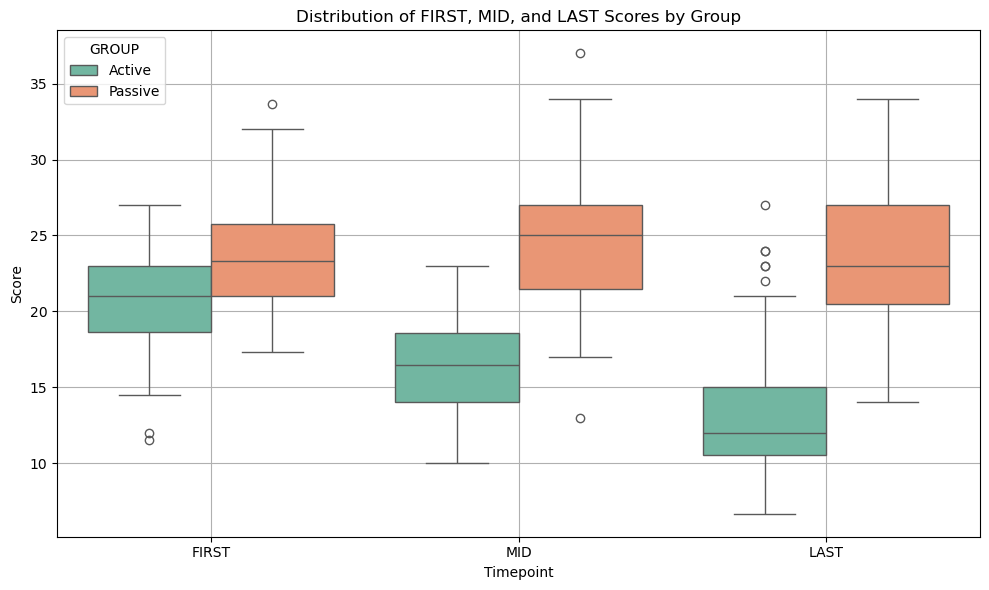

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the data into long format
df_score_dist = df_final[['GROUP', 'FIRST', 'MID', 'LAST']].melt(
    id_vars='GROUP',
    value_vars=['FIRST', 'MID', 'LAST'],
    var_name='Timepoint',
    value_name='Score'
)

# Drop missing values just in case
df_score_dist = df_score_dist.dropna(subset=['Score'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_score_dist, x='Timepoint', y='Score', hue='GROUP', palette='Set2')
plt.title('Distribution of FIRST, MID, and LAST Scores by Group')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()

# Save (optional)
#plt.savefig('C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/Plot/VISUALISATION/FIRST_MID_LAST_DISTRIBUTION.png', dpi=300, bbox_inches='tight')
plt.show()


SAVING FINAL DATA SET

In [ ]:
#df_final.to_csv("C:/Users/ASUS/OneDrive - AUT University/STAT995/DATA/DATA_CHANGED/SUB_WEEKLY_FINAL_1.csv", index=False)